#**Smartphone Decimeter Challenge**

CSC-4260/5260-001 Data Science Notebook conducted by Cade Kennedy, Harrison Peloquin, Kase Johnson, and Robert Bingham

##(a) Project Overview and Contributors

###Google's Problem Description

“Precise smartphone positioning services enable many of the navigation features that we use today. Yet, current mobile phones only offer 3-5 meters of positioning accuracy. Lane-specific directions aren't always possible, which can lead to missed exits or inaccurate arrival times.  

Machine learning models could improve the accuracy of Global Navigation Satellite System (GNSS) data, enabling billions of Android users to have a more fine-tuned positioning experience.

Google's Precise Location Team, part of Android, hosted the Smartphone Decimeter Challenge in 2021 and 2022. This year, this competition is again dedicated to finding innovative research in smartphone GNSS positioning accuracy to enhance people's ability to navigate the world around them.  

Your work will help improve positioning accuracy to sub-meter level, or even centimeters. As a result, Android users could gain better lane-level navigation or carpool estimates during congestion. Beyond the car, better location data could enable augmented reality walking tours, precise agriculture via phones, and more” (Chow et al., 2023).

###Our Team's Problem Description

In a modern world dominated by smartphones, people have become heavily reliant on the navigation system and applications on their smart devices for daily navigation. However, current smartphones only provide limited positioning accuracy. Moreover, lane-specific directions are not always possible. This can lead to inaccurate arrival times or even missed exits in real-time driving scenarios. To tackle accuracy issues, machine learning models can be trained to improve the accuracy of the Global Navigation Satellite System (GNSS) data, allowing billions of people to have a smoother driving experience. Google has challenged our team to conduct innovative research on smartphone GNSS positioning accuracy to enhance people's ability to navigate the world around them. Our work will help improve the accuracy to sub-meter level or even centimeters. As a result, billions of people can gain better lane navigation and carpool estimates during heavy traffic hours. Beyond everyday usage within the car, better location data can find applications in various fields such as tourism, agriculture, and others.  

#### Works Cited

Ashley Chow, Dave Orendorff, Michael Fu, Mohammed Khider, Sohier Dane, Vivek Gulati. (2023). Google Smartphone Decimeter Challenge 2023. Kaggle. https://kaggle.com/competitions/smartphone-decimeter-2023

###Dataset

The dataset for this project can be found here: [Google Smartphone Decimeter Challenge 2023](https://www.kaggle.com/competitions/smartphone-decimeter-2023)


####Description of the Dataset

The dataset is comprised of data collected from smartphones by Google containing Global Navigation Satellite System (GNSS) positional data. The core of the data includes signals and positional information sent from satellites and recieved on smartphone devices by their GNSS recievers. The types and versions of smartphones used vary and is not specified, so we assume any GNSS recieving smartphone is used here. The positional data emplored here is not the typical latitude and longitude that you would assume, but rather Earth centered, Earth fixed coordinates, which is basically a coordinate system that represents positions relative to the Earth's center. As such, the ECEF data has been and must continue to be converted to latitude and longitude for visualizations.

A few things to consider with this dataset: device diversity, signal obstruction and noise, and atmospheric interference. The device diversity could give variability in GNSS reciever quality, with cheaper and less reliable recievers being used in affordable smartphones and more reliable and expensive recievers used in newer flagship phones. Signal obstruction could be a number of things, the main of which occurs in urban areas where large buildings and objects, especially metal, may throw off some positional accuracy by obstructing signals from the satellites. Lastly, atmospheric interference occurs when the atmospher (ionosphere, troposphere) delay the signal transmission times, which throws off positional accuracy.

This description of the data was written by Kase Johnson

### Team Members

<!-- TEAM MEMBERs -->
<table style="width:100%">
    <thead>
        <tr>
            <th width="25%">Cade Kennedy</th>
            <th width="25%">Harrison Peloquin</th>
            <th width="25%">Kase Johnson</th>
            <th width="25%">Robert Bingham</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td width="25%">
                <a href="https://www.linkedin.com/in/cade-kennedy-107ab7249/">
                    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white"/>
                </a>
            </td>
             <td width="25%">
                <a href="https://www.linkedin.com/in/harrison-peloquin-2b080b24a/">
                    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white"/>
                </a>
            </td>
            <td width="25%">
                <!-- UPDATE TO YOUR LINKEDIN -->
                <a href="https://www.linkedin.com/in/kase-johnson-02a974205/">
                    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white"/>
                </a>
            </td>
            <td width="25%">
                <a href="https://www.linkedin.com/in/robert-bingham/">
                    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white"/>
                </a>
            </td>
        </tr>
    </tbody>
</table>

## (b) Setup

The first coding section of our report contains a step-by-step guide to set up the necessary requirements for the project. This process was discovered and coded by all four team members and documented by Harrison Peloquin.

First, we begin by installing all the important packages required. This includes pynmea2 and geoplot.

In [31]:
%%capture

# Making sure that these packages are installed
!pip install pynmea2
!pip install geoplot

Next, we must link the gdrive. This allows us to access the dataset. We decided on this implementation as personally uploading the file every time we opened Google Colab was extemely inefficient. This allows us to save valuable time and access the dataset in a quick, easy way. Ultimately, this solution was developed by Robert Bingham.

In [32]:
from google.colab import drive

drive.mount('/gdrive')
!ln -s "/gdrive/MyDrive/smartphone-decimeter-2023" "/content/"

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
ln: failed to create symbolic link '/content/smartphone-decimeter-2023': File exists


To see if it the last step was successful, we must next check the working directory.

In [33]:
!pwd # check the working directory
!ls

/content
Coordinate_2.png  sample_data  smartphone-decimeter-2023


Then, we look at a sample of the data. This step is to ensure the data is loaded. The results show us this is successful.

In [34]:
!head "./smartphone-decimeter-2023/sdc2023/sample_submission.csv"

tripId,UnixTimeMillis,LatitudeDegrees,LongitudeDegrees
2020-12-11-19-30-us-ca-mtv-e/pixel4xl,1607715055442,34.640195,-120.589642
2020-12-11-19-30-us-ca-mtv-e/pixel4xl,1607715056442,34.640195,-120.589642
2020-12-11-19-30-us-ca-mtv-e/pixel4xl,1607715057442,34.640195,-120.589642
2020-12-11-19-30-us-ca-mtv-e/pixel4xl,1607715058442,34.640195,-120.589642
2020-12-11-19-30-us-ca-mtv-e/pixel4xl,1607715059442,34.640195,-120.589642
2020-12-11-19-30-us-ca-mtv-e/pixel4xl,1607715060442,34.640195,-120.589642
2020-12-11-19-30-us-ca-mtv-e/pixel4xl,1607715061442,34.640195,-120.589642
2020-12-11-19-30-us-ca-mtv-e/pixel4xl,1607715062442,34.640195,-120.589642
2020-12-11-19-30-us-ca-mtv-e/pixel4xl,1607715063442,34.640195,-120.589642


We then run the next code block to import all the essential libraries and modules for later use. We continually add on to this code block as we progress through our project and implement a variety of tools and visualizations.

In [35]:
import glob
import itertools
import json
import os
import warnings
from dataclasses import dataclass
warnings.filterwarnings('ignore')

import geopandas as gpd
from geopandas import GeoDataFrame
import geoplot as gplt
from IPython.display import Video, display_html
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import pynmea2
import requests
import seaborn as sns
from shapely.geometry import Point, shape
import shapely.wkt
from tqdm.notebook import tqdm
from scipy.interpolate import InterpolatedUnivariateSpline


%matplotlib inline

WGS84_SEMI_MAJOR_AXIS = 6378137.0
WGS84_SEMI_MINOR_AXIS = 6356752.314245
WGS84_SQUARED_FIRST_ECCENTRICITY  = 6.69437999013e-3
WGS84_SQUARED_SECOND_ECCENTRICITY = 6.73949674226e-3

HAVERSINE_RADIUS = 6_371_000

Next, we write the necessary functions and classes that will be used in our project to handle geographic coordinate conversions and distance calculations.

In [36]:
@dataclass
class ECEF:
    x: np.array
    y: np.array
    z: np.array

    def to_numpy(self):
        return np.stack([self.x, self.y, self.z], axis=0)

    @staticmethod
    def from_numpy(pos):
        x, y, z = [np.squeeze(w) for w in np.split(pos, 3, axis=-1)]
        return ECEF(x=x, y=y, z=z)

@dataclass
class BLH:
    lat : np.array
    lng : np.array
    hgt : np.array

def ECEF_to_BLH(ecef):
    a = WGS84_SEMI_MAJOR_AXIS
    b = WGS84_SEMI_MINOR_AXIS
    e2  = WGS84_SQUARED_FIRST_ECCENTRICITY
    e2_ = WGS84_SQUARED_SECOND_ECCENTRICITY
    x = ecef.x
    y = ecef.y
    z = ecef.z
    r = np.sqrt(x**2 + y**2)
    t = np.arctan2(z * (a/b), r)
    B = np.arctan2(z + (e2_*b)*np.sin(t)**3, r - (e2*a)*np.cos(t)**3)
    L = np.arctan2(y, x)
    n = a / np.sqrt(1 - e2*np.sin(B)**2)
    H = (r / np.cos(B)) - n
    return BLH(lat=B, lng=L, hgt=H)

def haversine_distance(blh_1, blh_2):
    dlat = blh_2.lat - blh_1.lat
    dlng = blh_2.lng - blh_1.lng
    a = np.sin(dlat/2)**2 + np.cos(blh_1.lat) * np.cos(blh_2.lat) * np.sin(dlng/2)**2
    dist = 2 * HAVERSINE_RADIUS * np.arcsin(np.sqrt(a))
    return dist

def pandas_haversine_distance(df1, df2):
    blh1 = BLH(
        lat=np.deg2rad(df1['LatitudeDegrees'].to_numpy()),
        lng=np.deg2rad(df1['LongitudeDegrees'].to_numpy()),
        hgt=0,
    )
    blh2 = BLH(
        lat=np.deg2rad(df2['LatitudeDegrees'].to_numpy()),
        lng=np.deg2rad(df2['LongitudeDegrees'].to_numpy()),
        hgt=0,
    )
    return haversine_distance(blh1, blh2)

def ecef_to_lat_lng(tripID, gnss_df, UnixTimeMillis):
    ecef_columns = ['WlsPositionXEcefMeters', 'WlsPositionYEcefMeters', 'WlsPositionZEcefMeters']
    columns = ['utcTimeMillis'] + ecef_columns
    ecef_df = (gnss_df.drop_duplicates(subset='utcTimeMillis')[columns]
               .dropna().reset_index(drop=True))
    ecef = ECEF.from_numpy(ecef_df[ecef_columns].to_numpy())
    blh  = ECEF_to_BLH(ecef)

    TIME = ecef_df['utcTimeMillis'].to_numpy()
    lat = InterpolatedUnivariateSpline(TIME, blh.lat, ext=3)(UnixTimeMillis)
    lng = InterpolatedUnivariateSpline(TIME, blh.lng, ext=3)(UnixTimeMillis)
    return pd.DataFrame({
        'tripId' : tripID,
        'UnixTimeMillis'   : UnixTimeMillis,
        'LatitudeDegrees'  : np.degrees(lat),
        'LongitudeDegrees' : np.degrees(lng),
    })

def calc_score(tripID, pred_df, gt_df):
    d = pandas_haversine_distance(pred_df, gt_df)
    score = np.mean([np.quantile(d, 0.50), np.quantile(d, 0.95)])
    return score

Here we use a regex pattern to search through all the directories and glob all the files with `device_gnss.csv`. For each file found, we read the csv and append the data to a list. Once we have gone through all the files, we can concatenate all the data leaving us with the entire dataset.

In [37]:
gnss_data = []
gt_data = []
imu_data = []

for subdirectory in glob.glob(f'./smartphone-decimeter-2023/sdc2023/train/2023-*/*'):
  # Check if the directory contains the required files
  if all(os.path.isfile(os.path.join(subdirectory, filename)) for filename in ['device_gnss.csv', 'ground_truth.csv', 'device_imu.csv']):
    drive, phone = subdirectory.split('/')[-2:]
    tripID  = f'{drive}/{phone}'

    # Read the data from the files
    gnss_data.append(pd.read_csv(os.path.join(subdirectory, 'device_gnss.csv')))
    gt_data.append(pd.read_csv(os.path.join(subdirectory, 'ground_truth.csv')))
    imu_data.append(pd.read_csv(os.path.join(subdirectory, 'device_imu.csv')))

    gnss_data[-1]["TripID"] = tripID
    gt_data[-1]["TripID"] = tripID
    imu_data[-1]["TripID"] = tripID

gnss_df = pd.concat(gnss_data)
gt_df = pd.concat(gt_data)
imu_df = pd.concat(imu_data)

These next codeblocks print out the shape of the dataframe, the columns in the dataframe, and displays a portion of the data from the dataframe.

In [38]:
print(gnss_df.shape)
print(gnss_df.columns)
gnss_df.head()

(284673, 59)
Index(['MessageType', 'utcTimeMillis', 'TimeNanos', 'LeapSecond',
       'TimeUncertaintyNanos', 'FullBiasNanos', 'BiasNanos',
       'BiasUncertaintyNanos', 'DriftNanosPerSecond',
       'DriftUncertaintyNanosPerSecond', 'HardwareClockDiscontinuityCount',
       'Svid', 'TimeOffsetNanos', 'State', 'ReceivedSvTimeNanos',
       'ReceivedSvTimeUncertaintyNanos', 'Cn0DbHz',
       'PseudorangeRateMetersPerSecond',
       'PseudorangeRateUncertaintyMetersPerSecond',
       'AccumulatedDeltaRangeState', 'AccumulatedDeltaRangeMeters',
       'AccumulatedDeltaRangeUncertaintyMeters', 'CarrierFrequencyHz',
       'CarrierCycles', 'CarrierPhase', 'CarrierPhaseUncertainty',
       'MultipathIndicator', 'SnrInDb', 'ConstellationType', 'AgcDb',
       'BasebandCn0DbHz', 'FullInterSignalBiasNanos',
       'FullInterSignalBiasUncertaintyNanos', 'SatelliteInterSignalBiasNanos',
       'SatelliteInterSignalBiasUncertaintyNanos', 'CodeType',
       'ChipsetElapsedRealtimeNanos', 'ArrivalT

MessageType  utcTimeMillis    TimeNanos  LeapSecond  TimeUncertaintyNanos  \
0         Raw  1693944819000  63892000000         NaN                   NaN   
1         Raw  1693944819000  63892000000         NaN                   NaN   
2         Raw  1693944819000  63892000000         NaN                   NaN   
3         Raw  1693944819000  63892000000         NaN                   NaN   
4         Raw  1693944819000  63892000000         NaN                   NaN   

         FullBiasNanos  BiasNanos  BiasUncertaintyNanos  DriftNanosPerSecond  \
0 -1377979973108431091        0.0                5.9081                 43.0   
1 -1377979973108431091        0.0                5.9081                 43.0   
2 -1377979973108431091        0.0                5.9081                 43.0   
3 -1377979973108431091        0.0                5.9081                 43.0   
4 -1377979973108431091        0.0                5.9081                 43.0   

   DriftUncertaintyNanosPerSecond  ...  SvVelocityZEcefMetersPerSecond  \
0                             1.0  ...                     -616.267223   
1                             1.0  ...                    -3015.723749   
2                             1.0  ...                    -1791.842834   
3                             1.0  ...                     -982.880850   
4                             1.0  ...                    -2959.063284   

   SvClockBiasMeters  SvClockDriftMetersPerSecond  IsrbMeters  \
0     -167089.931999                     0.002872         0.0   
1      -42207.165917                     0.000145         0.0   
2      -15642.778708                    -0.000351         0.0   
3       44806.913823                     0.001880         0.0   
4       19311.773997                     0.001208         0.0   

   IonosphericDelayMeters  TroposphericDelayMeters  WlsPositionXEcefMeters  \
0                6.799310                 3.771417           -2.678289e+06   
1                8.983671                 5.011089           -2.678289e+06   
2                6.352281                 3.406361           -2.678289e+06   
3                6.033352                 3.244419           -2.678289e+06   
4               12.011107                 9.878781           -2.678289e+06   

   WlsPositionYEcefMeters  WlsPositionZEcefMeters  \
0           -4.311258e+06            3.849762e+06   
1           -4.311258e+06            3.849762e+06   
2           -4.311258e+06            3.849762e+06   
3           -4.311258e+06            3.849762e+06   
4           -4.311258e+06            3.849762e+06   

                             TripID  
0  2023-09-05-20-13-us-ca/pixel7pro  
1  2023-09-05-20-13-us-ca/pixel7pro  
2  2023-09-05-20-13-us-ca/pixel7pro  
3  2023-09-05-20-13-us-ca/pixel7pro  
4  2023-09-05-20-13-us-ca/pixel7pro  

[5 rows x 59 columns]

In [39]:
print(gt_df.shape)
print(gt_df.columns)
gt_df.head()

(7953, 14)
Index(['MessageType', 'Provider', 'LatitudeDegrees', 'LongitudeDegrees',
       'AltitudeMeters', 'SpeedMps', 'AccuracyMeters', 'BearingDegrees',
       'UnixTimeMillis', 'SpeedAccuracyMps', 'BearingAccuracyDegrees',
       'elapsedRealtimeNanos', 'VerticalAccuracyMeters', 'TripID'],
      dtype='object')


MessageType Provider  LatitudeDegrees  LongitudeDegrees  AltitudeMeters  \
0         Fix       GT        37.366004       -121.849823         1.31563   
1         Fix       GT        37.366004       -121.849823         1.31563   
2         Fix       GT        37.366004       -121.849823         1.31563   
3         Fix       GT        37.366004       -121.849823         1.31563   
4         Fix       GT        37.366004       -121.849823         1.31563   

   SpeedMps  AccuracyMeters  BearingDegrees  UnixTimeMillis  SpeedAccuracyMps  \
0  0.000004           0.100       22.142252   1693944819000               NaN   
1  0.000996           0.100       22.142263   1693944820000               NaN   
2  0.000996           0.100       22.142138   1693944821000               NaN   
3  0.000000           0.100       22.142200   1693944822000               NaN   
4  0.000004           0.099       22.142092   1693944823000               NaN   

   BearingAccuracyDegrees  elapsedRealtimeNanos  VerticalAccuracyMeters  \
0                     NaN                   NaN                     NaN   
1                     NaN                   NaN                     NaN   
2                     NaN                   NaN                     NaN   
3                     NaN                   NaN                     NaN   
4                     NaN                   NaN                     NaN   

                             TripID  
0  2023-09-05-20-13-us-ca/pixel7pro  
1  2023-09-05-20-13-us-ca/pixel7pro  
2  2023-09-05-20-13-us-ca/pixel7pro  
3  2023-09-05-20-13-us-ca/pixel7pro  
4  2023-09-05-20-13-us-ca/pixel7pro

In [40]:
print(imu_df.shape)
print(imu_df.columns)
imu_df.head()

(2103984, 10)
Index(['MessageType', 'utcTimeMillis', 'elapsedRealtimeNanos', 'MeasurementX',
       'MeasurementY', 'MeasurementZ', 'BiasX', 'BiasY', 'BiasZ', 'TripID'],
      dtype='object')


MessageType  utcTimeMillis  elapsedRealtimeNanos  MeasurementX  \
0  UncalAccel  1693944818394         3936103833431      0.052642   
1   UncalGyro  1693944818402         3936112137702     -0.006567   
2  UncalAccel  1693944818402         3936112137702      0.075972   
3   UncalGyro  1693944818411         3936120467344      0.005040   
4  UncalAccel  1693944818411         3936120467344      0.190828   

   MeasurementY  MeasurementZ  BiasX  BiasY  BiasZ  \
0      9.572487     -2.462214    0.0    0.0    0.0   
1      0.000916     -0.000611    0.0    0.0    0.0   
2      9.455837     -2.293521    0.0    0.0    0.0   
3      0.001680      0.001833    0.0    0.0    0.0   
4      9.474979     -2.273780    0.0    0.0    0.0   

                             TripID  
0  2023-09-05-20-13-us-ca/pixel7pro  
1  2023-09-05-20-13-us-ca/pixel7pro  
2  2023-09-05-20-13-us-ca/pixel7pro  
3  2023-09-05-20-13-us-ca/pixel7pro  
4  2023-09-05-20-13-us-ca/pixel7pro

## (c) Exploratory Data Analysis

Now that we have finished setting up our project, we can begin exploring the data. This section contains our initial data analysis as well as data cleaning and data wrangling techniques. All four team members contributed to this process.

We begin the exploratory data analysis by downloading a geojson file of the US San Francisco Bay Area. Then, we extract polygons representing different parts of the Bay Area and convert them into a geopandas dataframe. We will focus on extracting and preparing the geometries for only two specific polygons, object 6 and object 7.

In [41]:
# download geojson file of US San Francisco Bay Area.
r = requests.get("https://data.sfgov.org/api/views/wamw-vt4s/rows.json?accessType=DOWNLOAD")
r.raise_for_status()

# get geojson from response
data = r.json()

# get polygons that represents San Francisco Bay Area.
shapes = []
for d in data["data"]:
    shapes.append(shapely.wkt.loads(d[8]))

# convert list of polygons to geopandas dataframe.
gdf_bayarea = pd.DataFrame()

# only use the 6 and 7th object.
for shp in shapes[5:7]:
    tmp = pd.DataFrame({'geometry': [shp]})
    gdf_bayarea = pd.concat([gdf_bayarea, tmp])
gdf_bayarea = GeoDataFrame(gdf_bayarea)

This next code block reads csv files containing ground truth data. It then organizes the data into geodataframes, grouping them by collection for easy visualization.

In [42]:
collection_names = [item.split("/")[-1] for item in glob.glob("./smartphone-decimeter-2023/sdc2023/train/*")]

gdfs = []
for collection_name in collection_names:
    gdfs_each_collectionName = []
    csv_paths = glob.glob(f"./smartphone-decimeter-2023/sdc2023/train/{collection_name}/*/ground_truth.csv")
    for csv_path in csv_paths:
        df_gt = pd.read_csv(csv_path)
        df_gt['collectionName'] = collection_name
        df_gt["geometry"] = [Point(lngDeg, latDeg) for lngDeg, latDeg in zip(df_gt["LongitudeDegrees"], df_gt["LatitudeDegrees"])]
        gdfs_each_collectionName.append(GeoDataFrame(df_gt))
    gdfs.append(gdfs_each_collectionName)

Next, we create visualizations that plot the tracks over a map of the San Francisco Bay Area on the left and only the track without the map on the right.

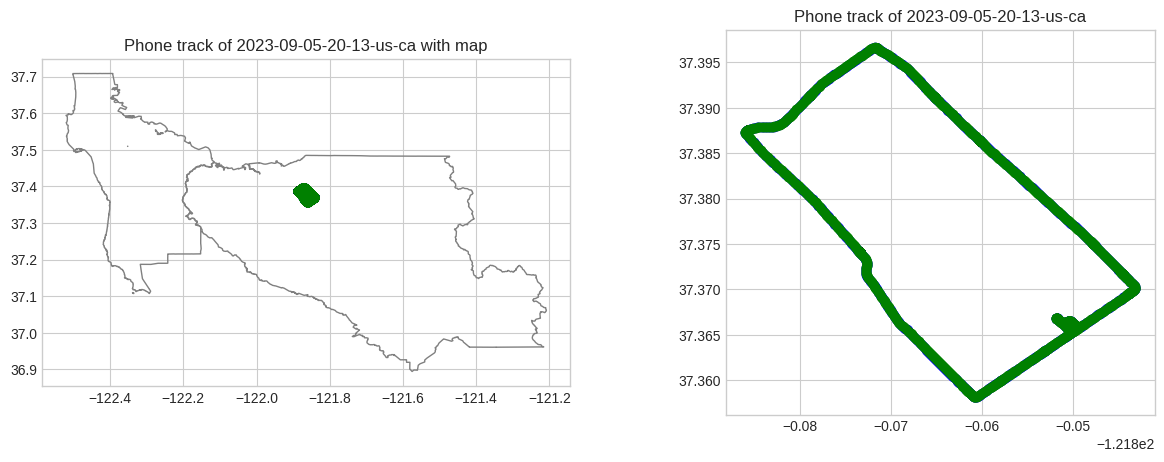

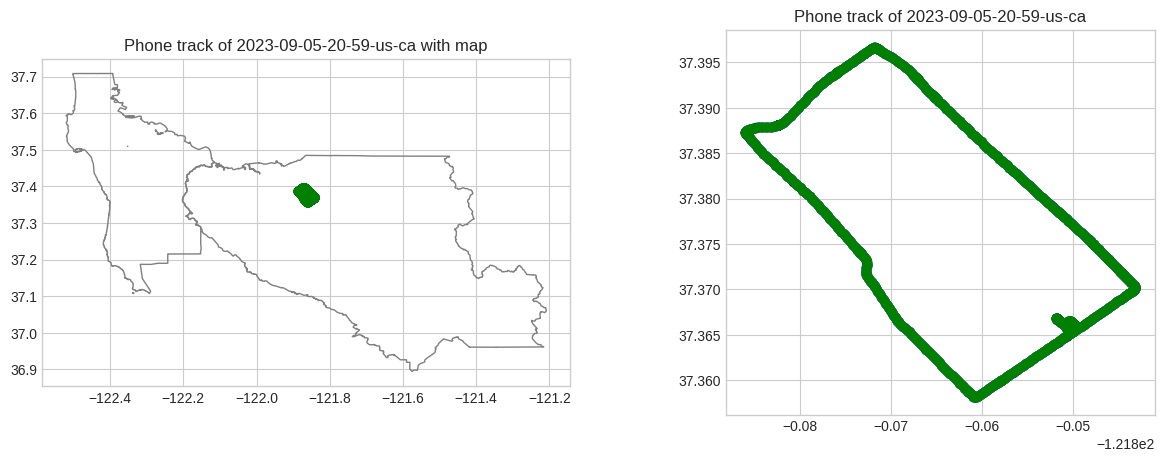

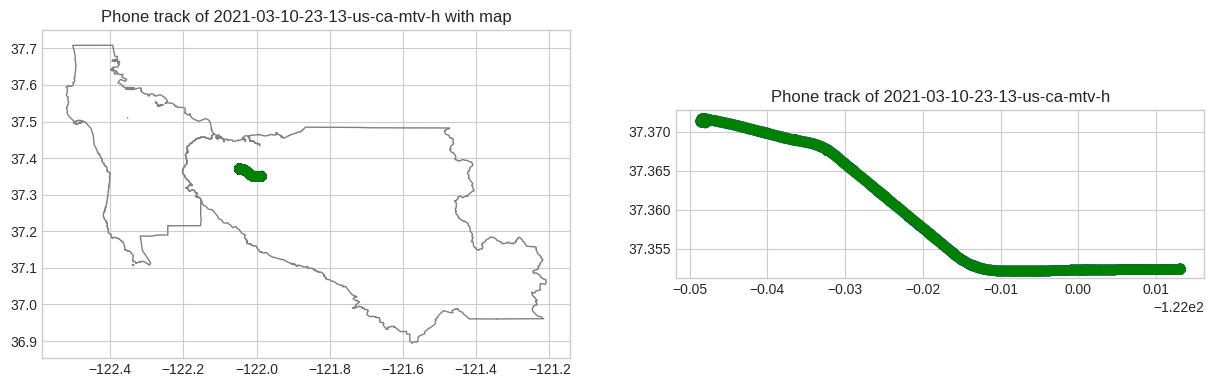

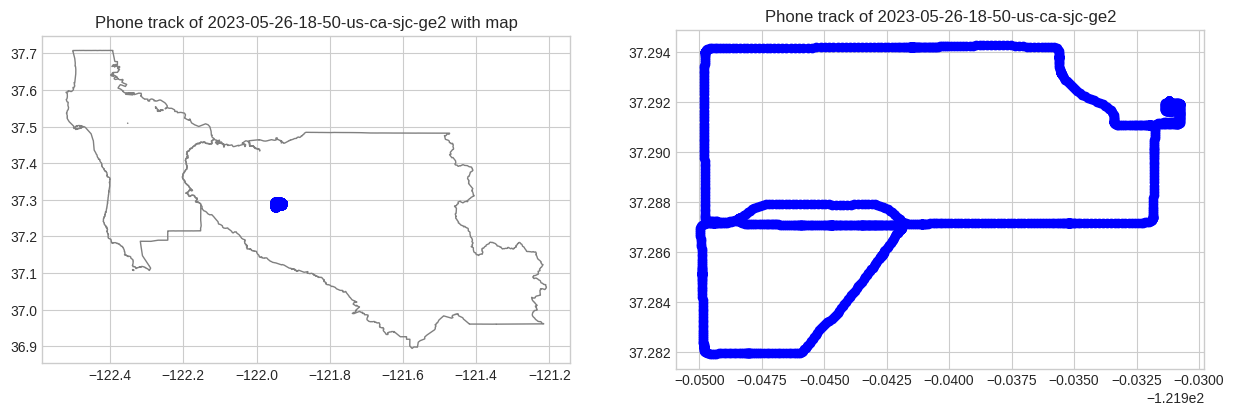

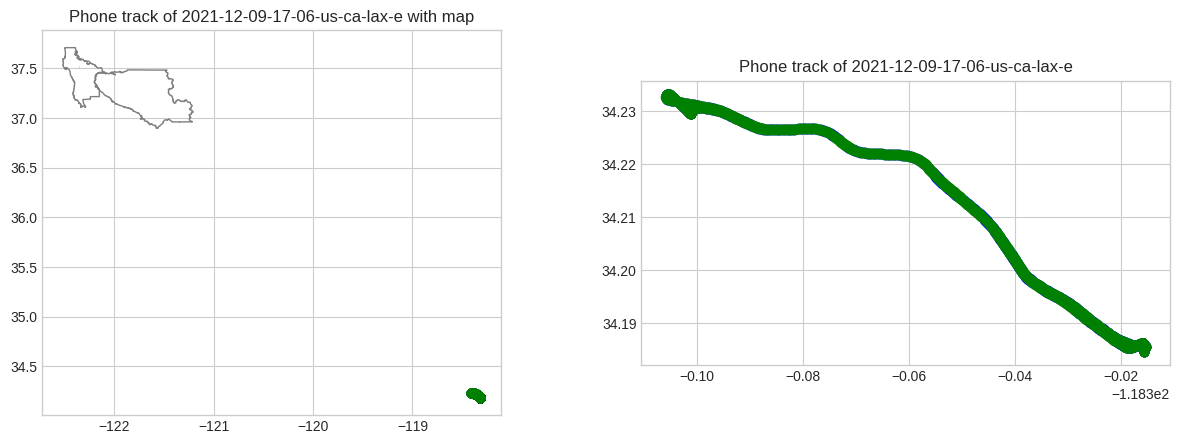

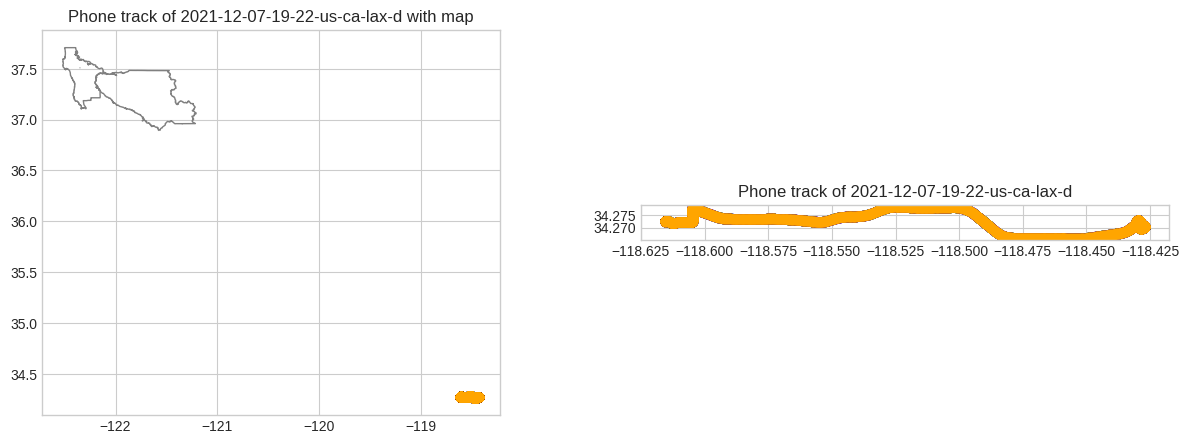

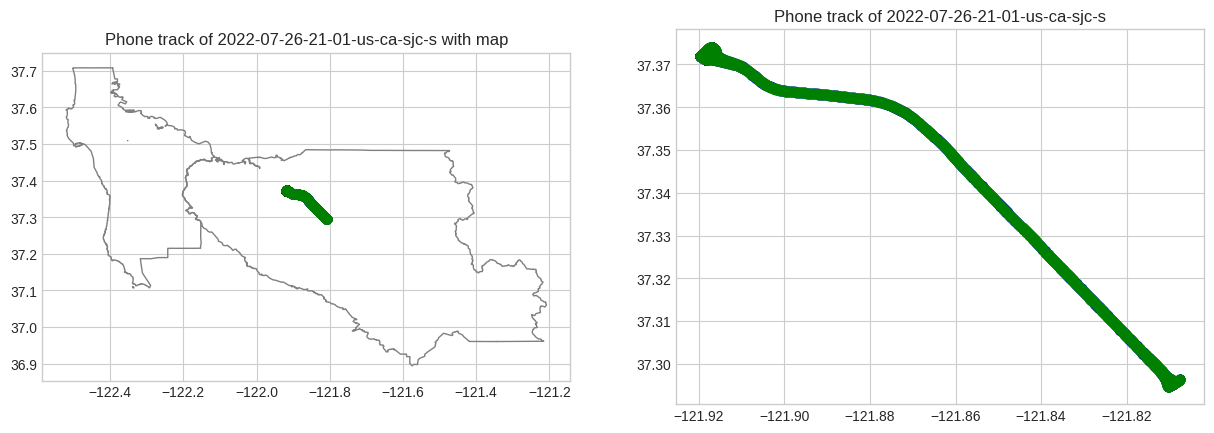

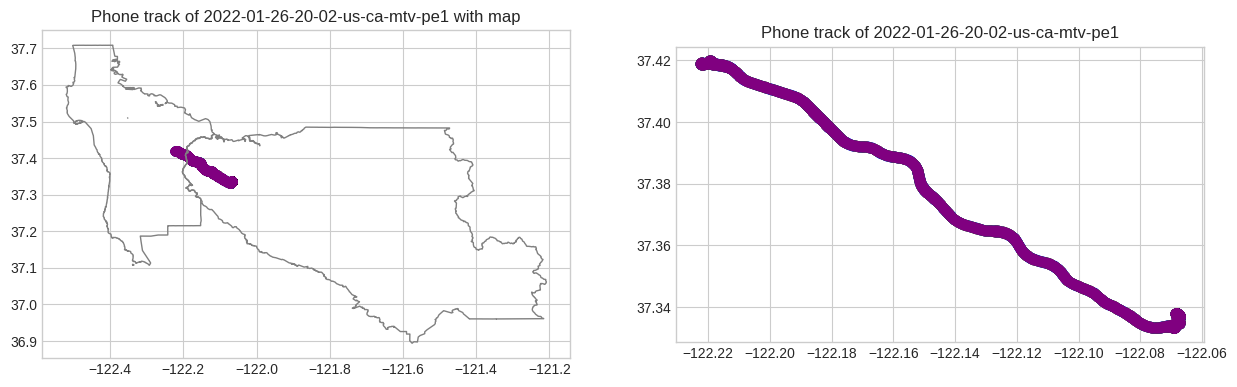

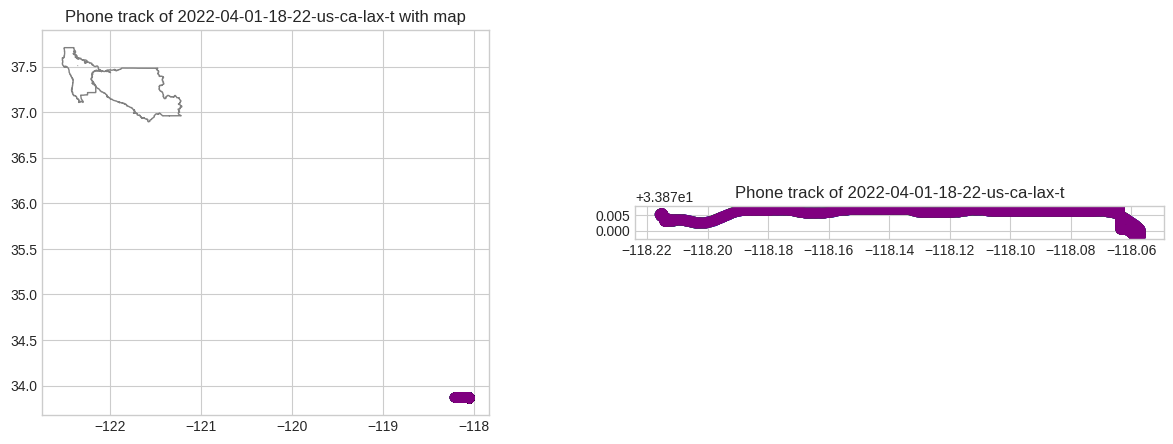

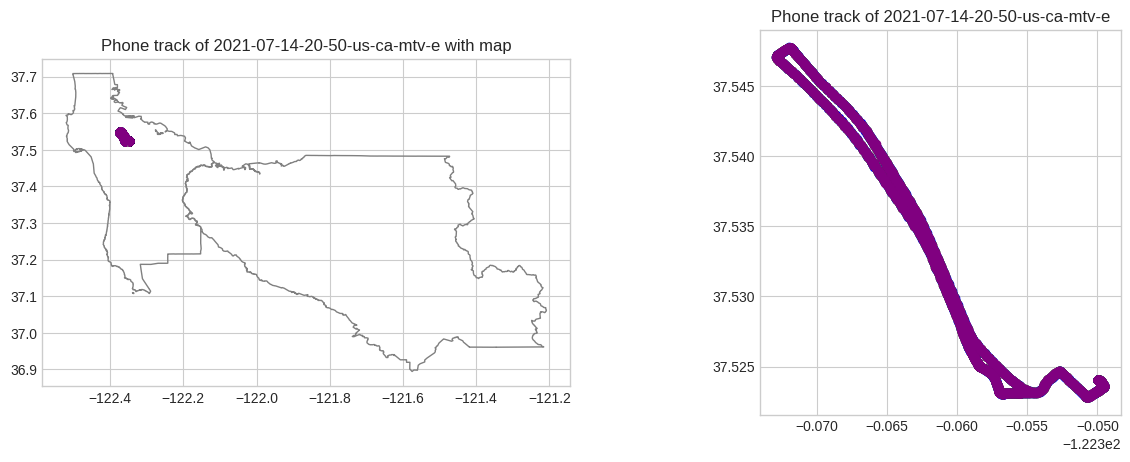

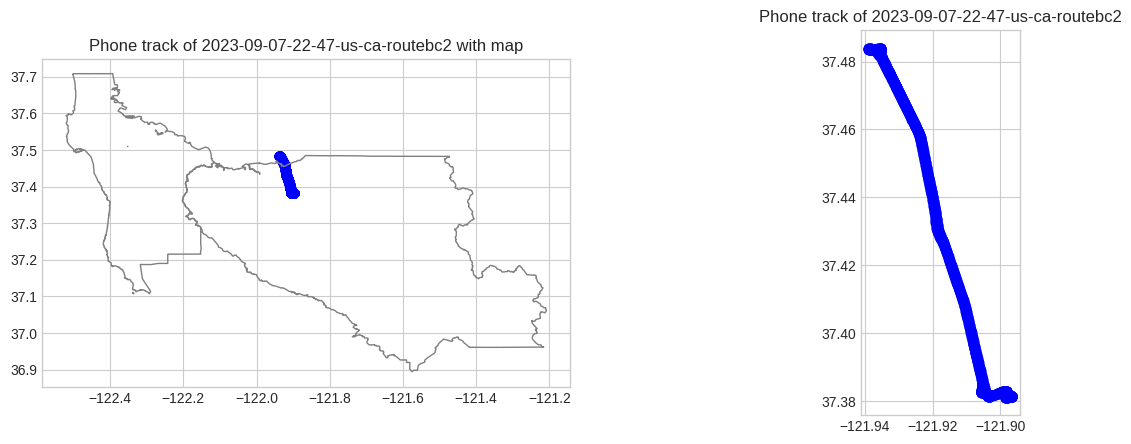

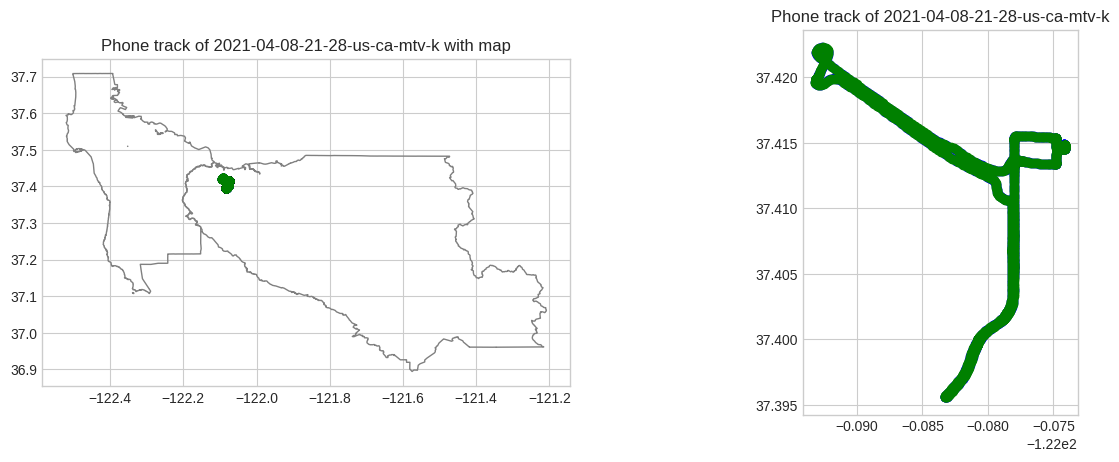

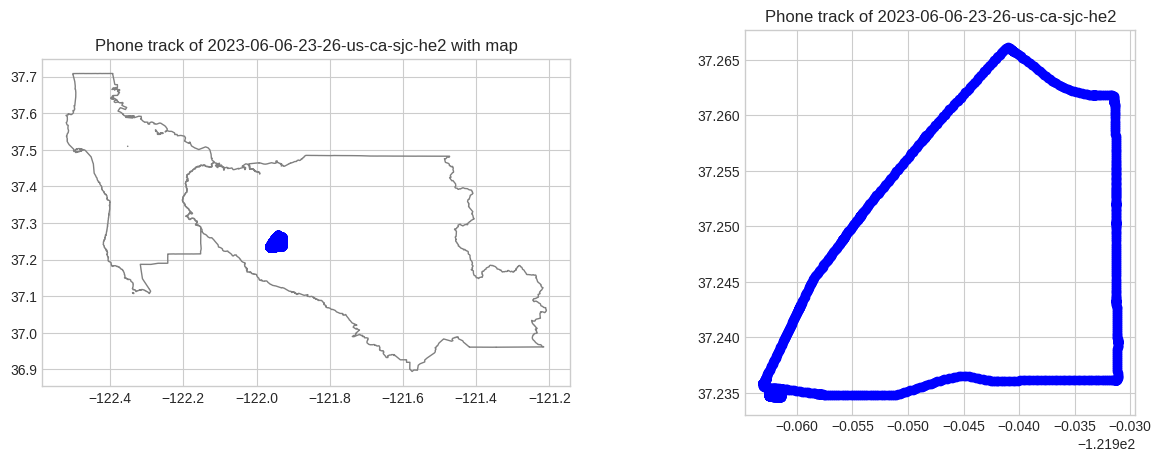

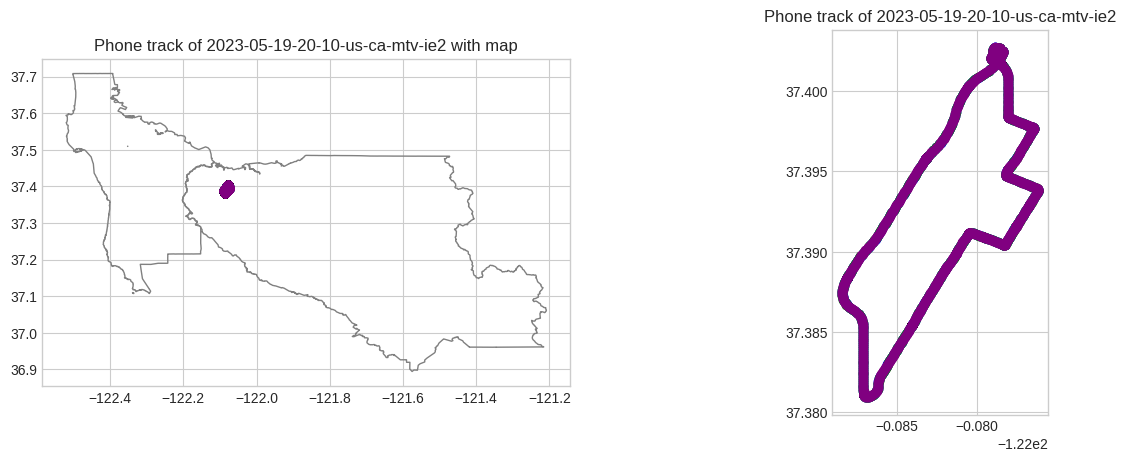

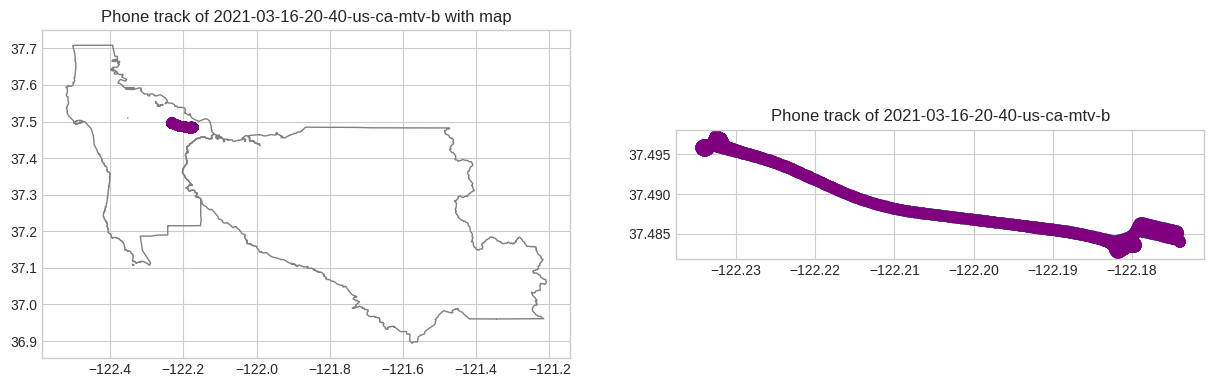

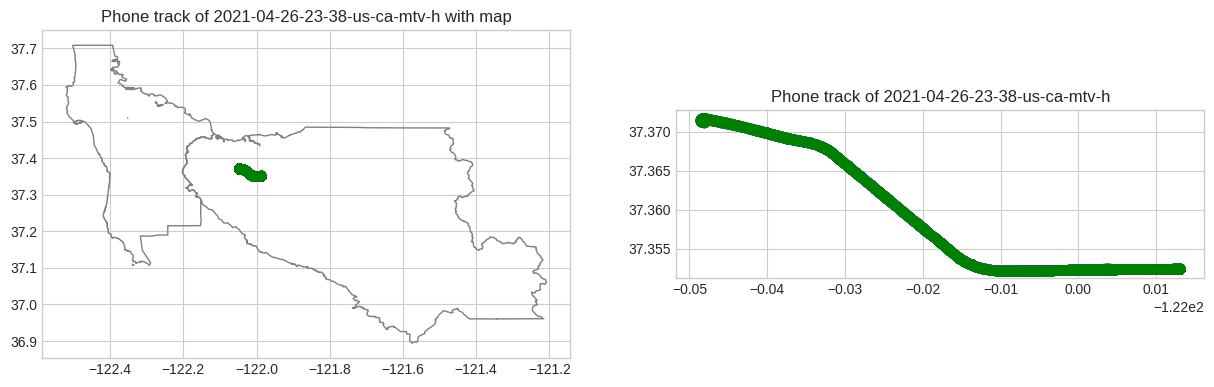

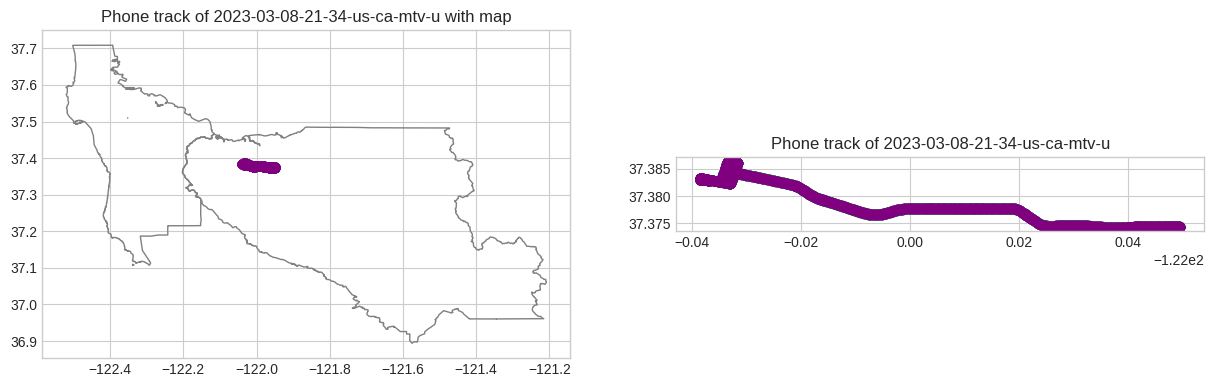

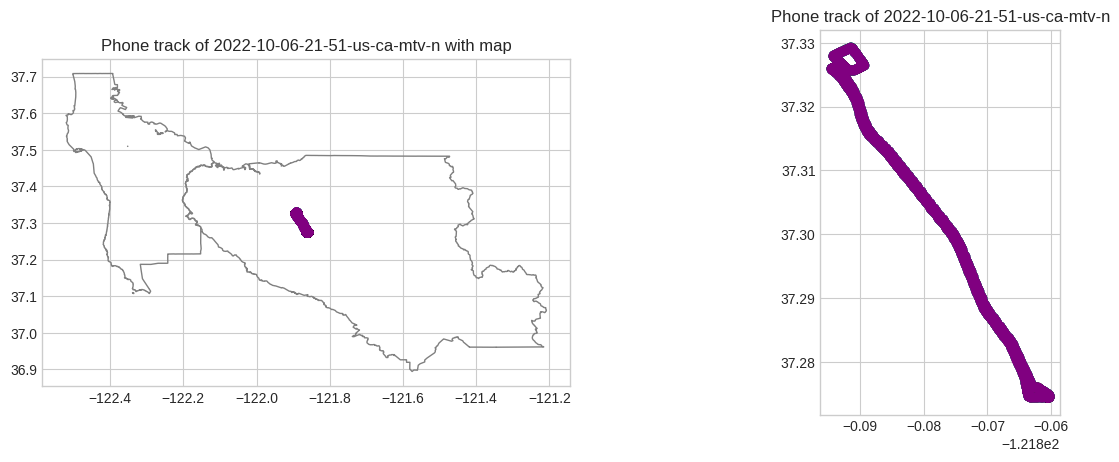

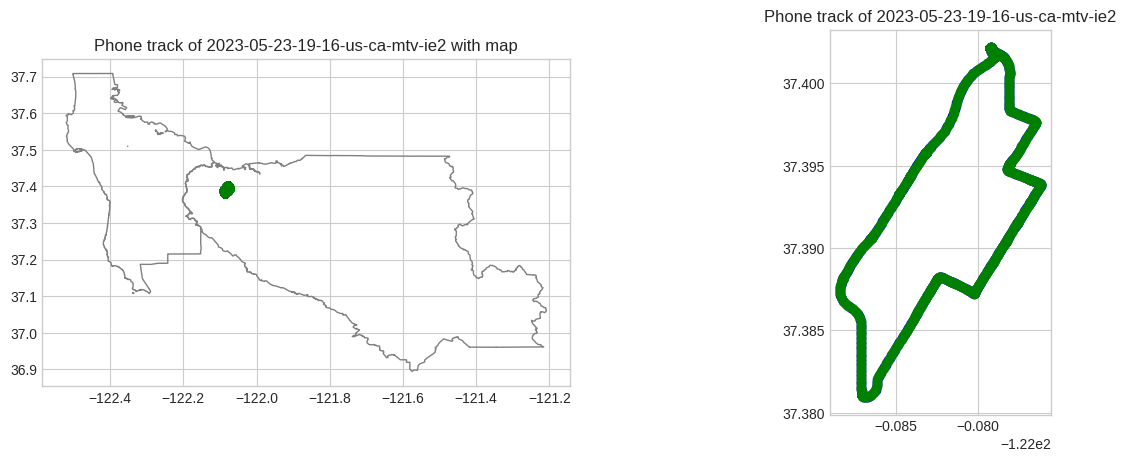

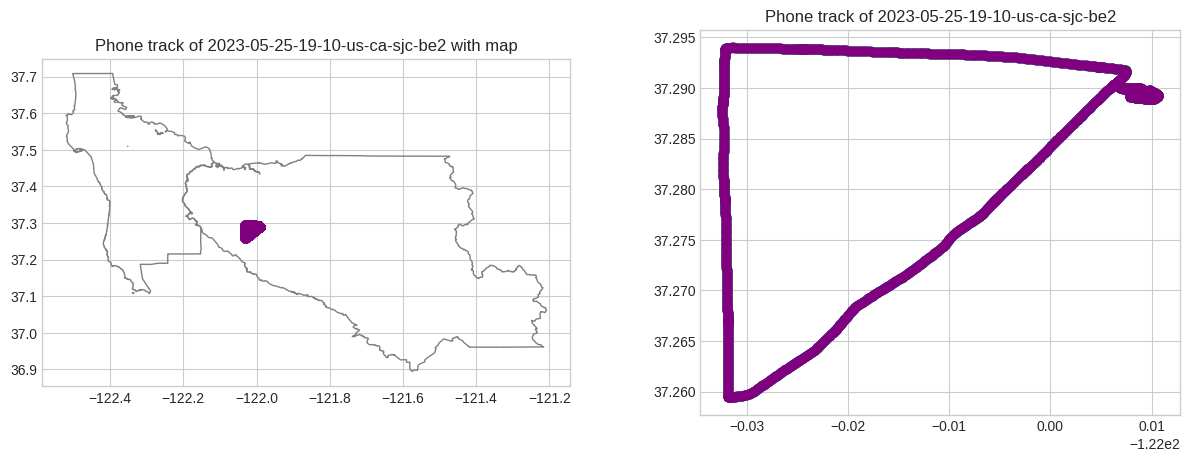

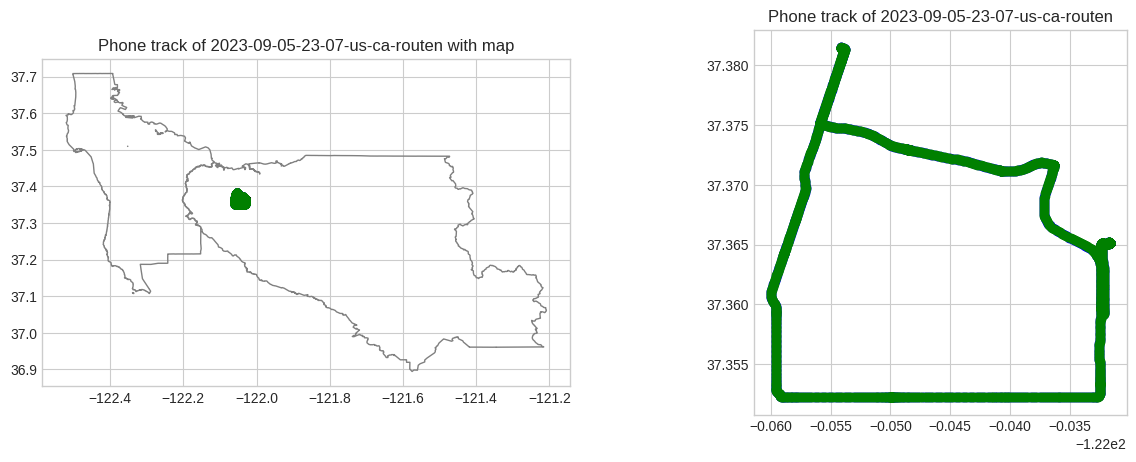

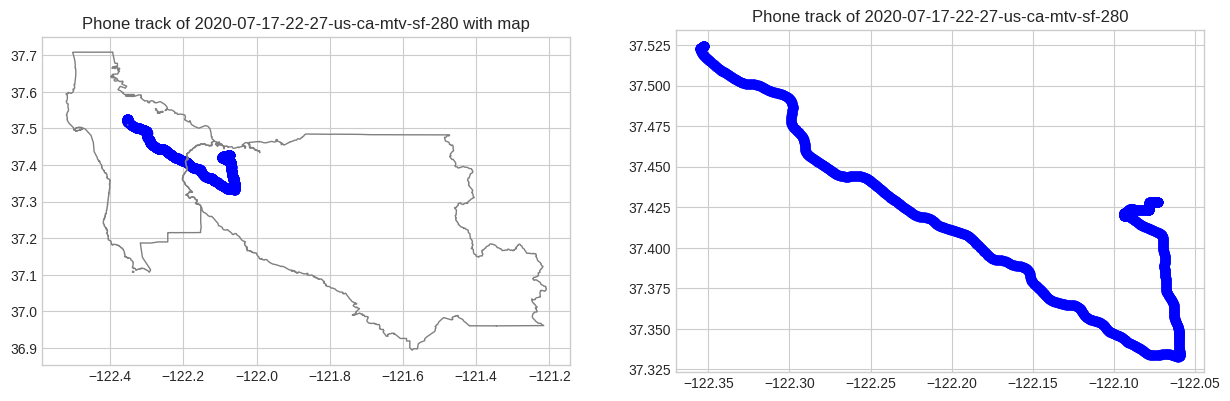

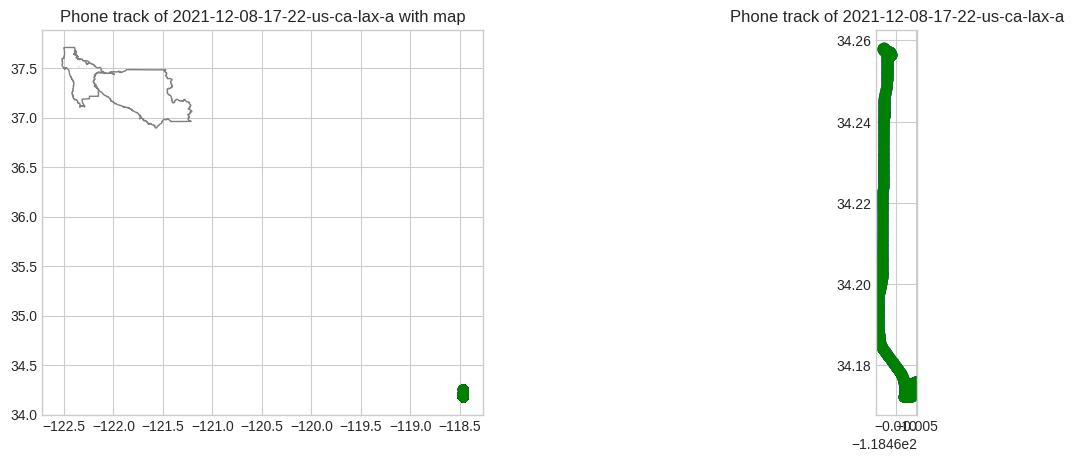

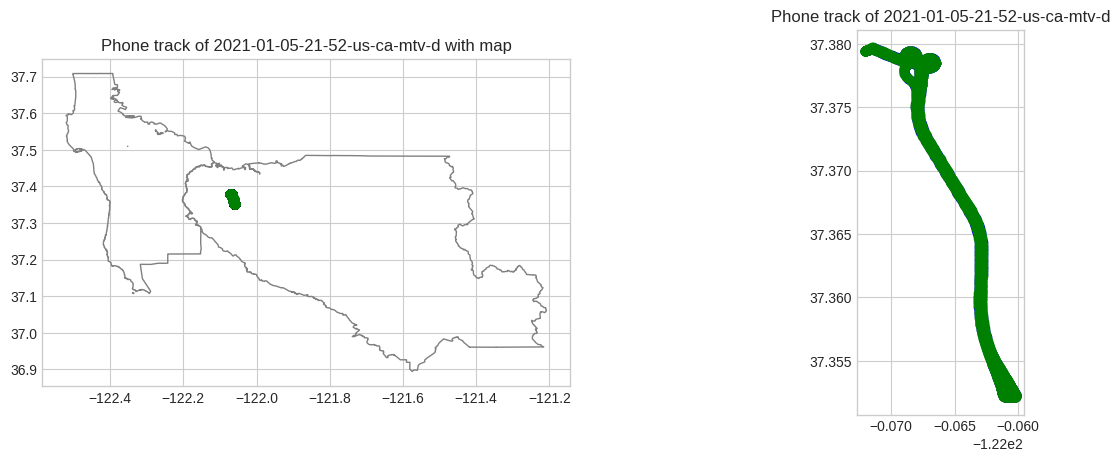

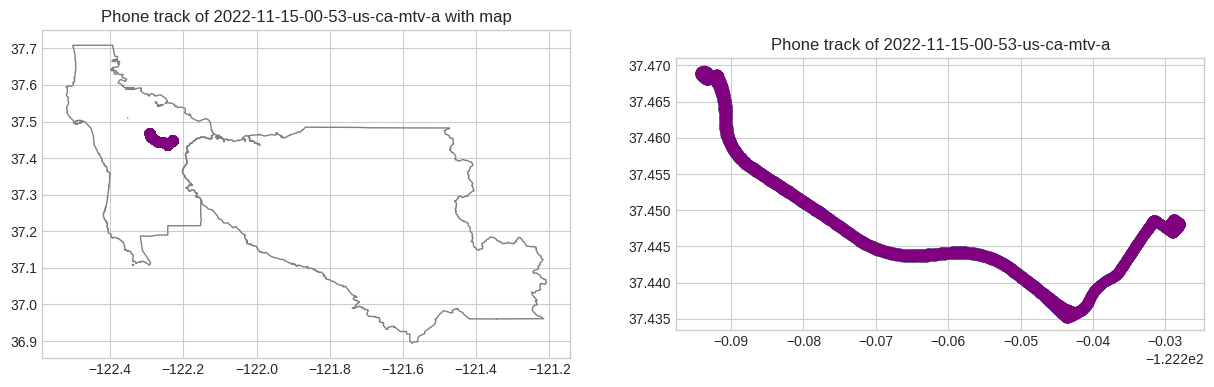

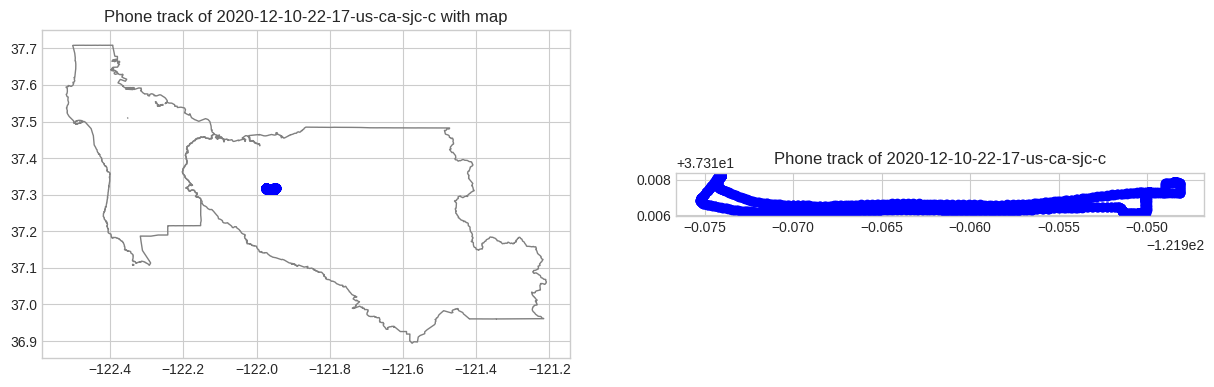

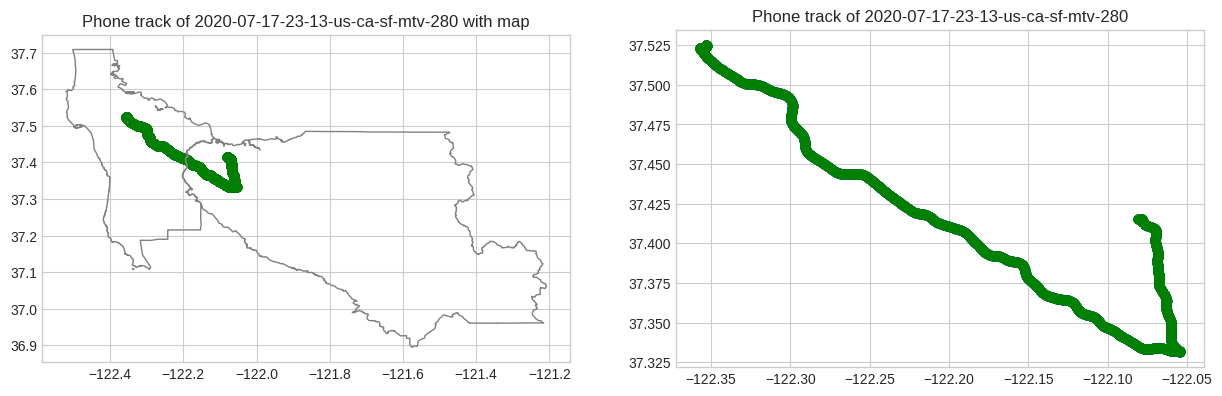

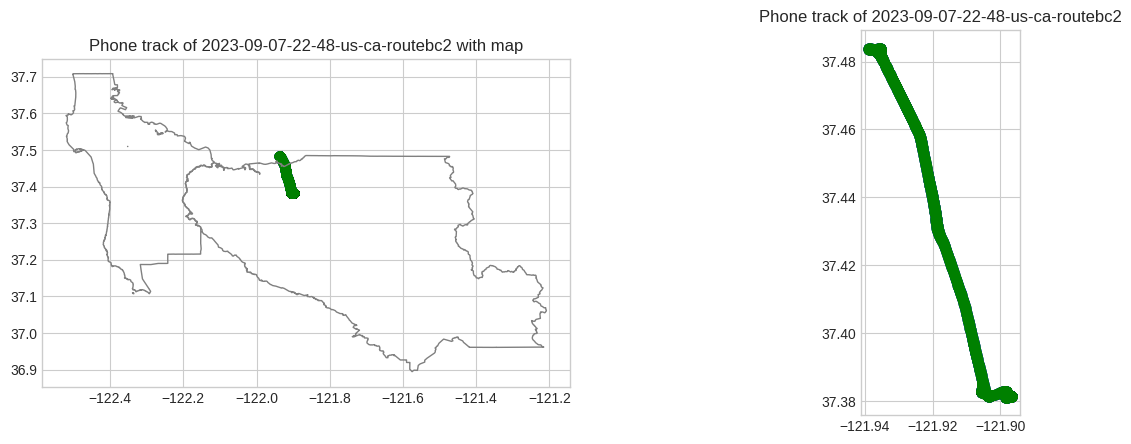

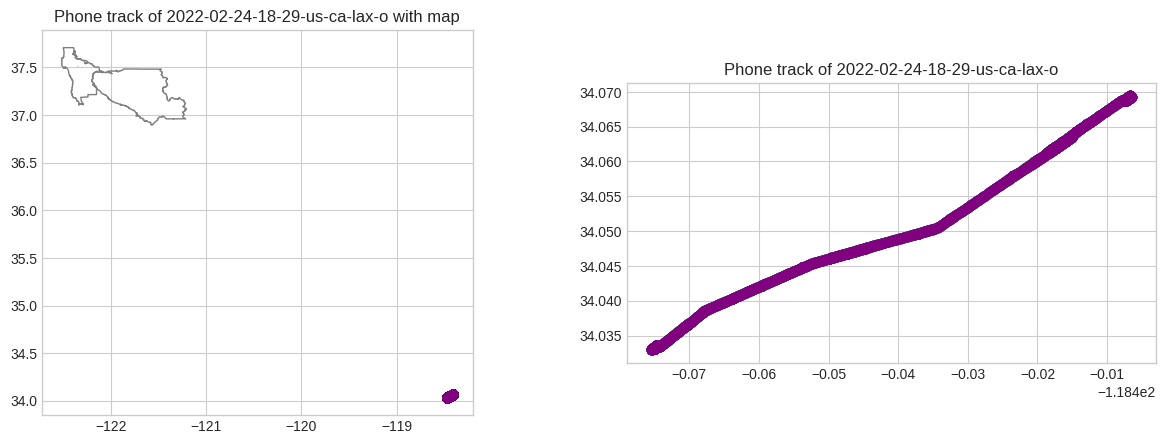

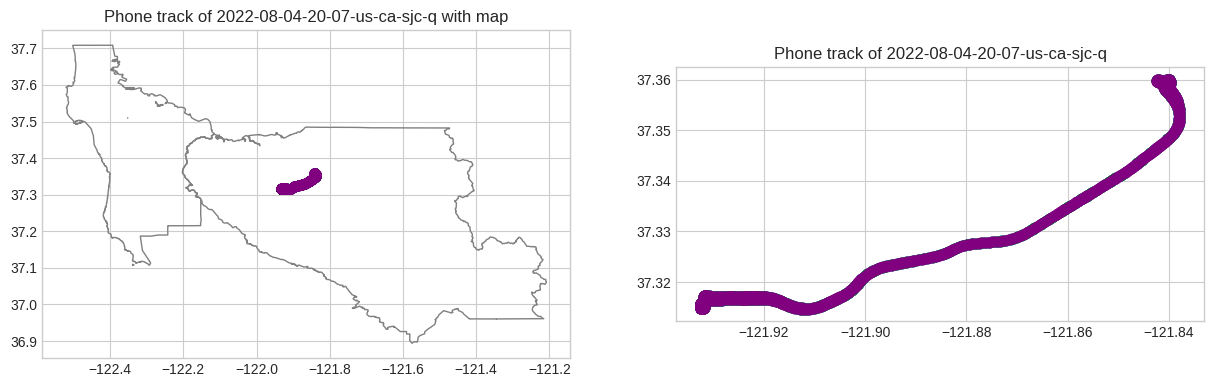

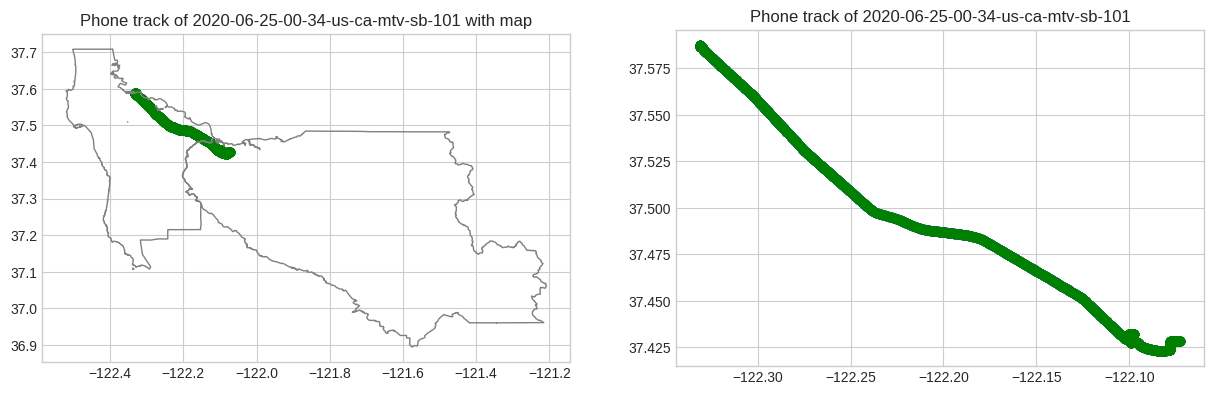

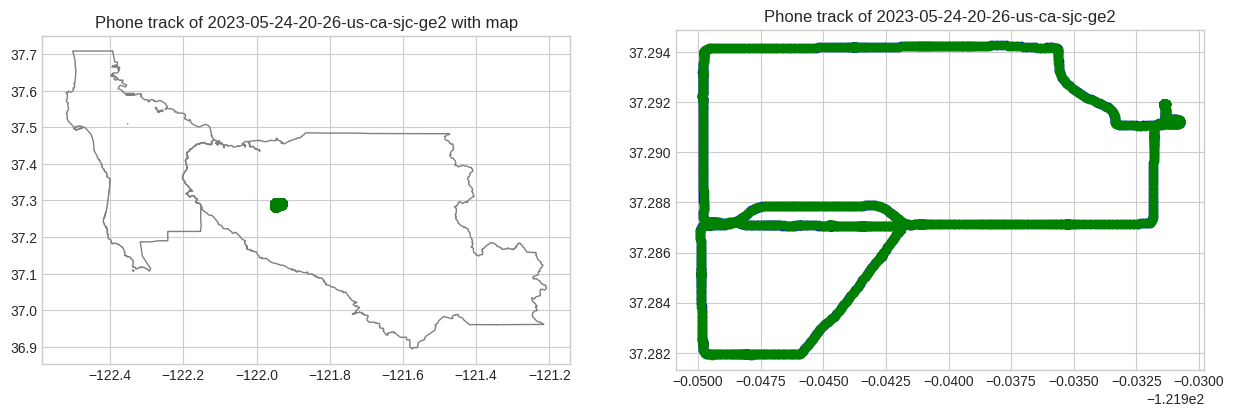

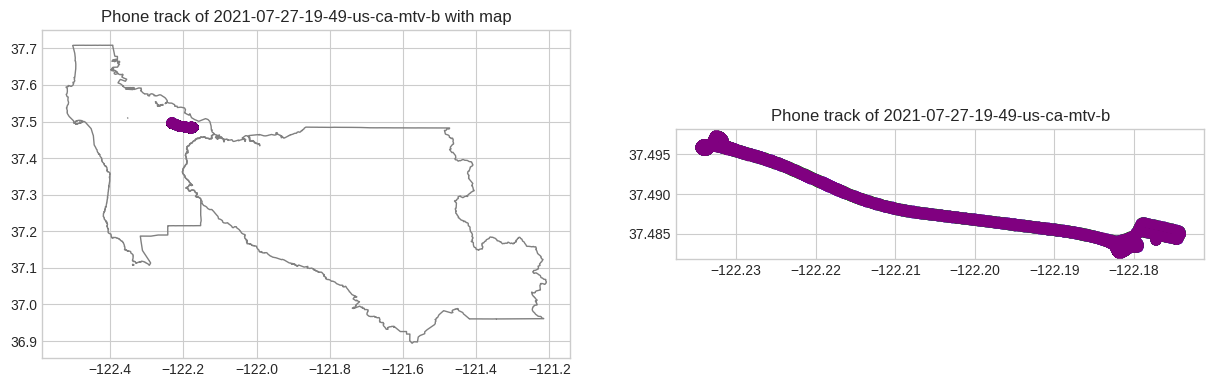

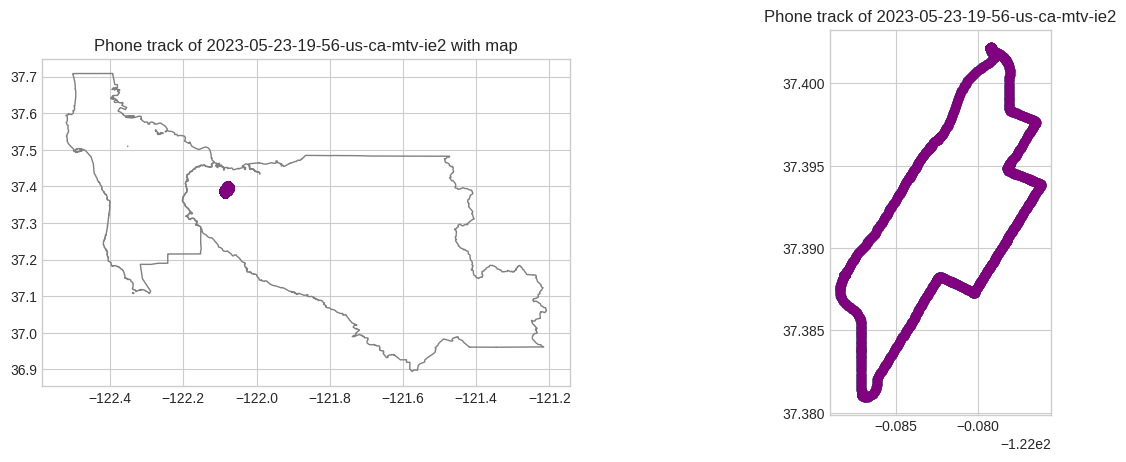

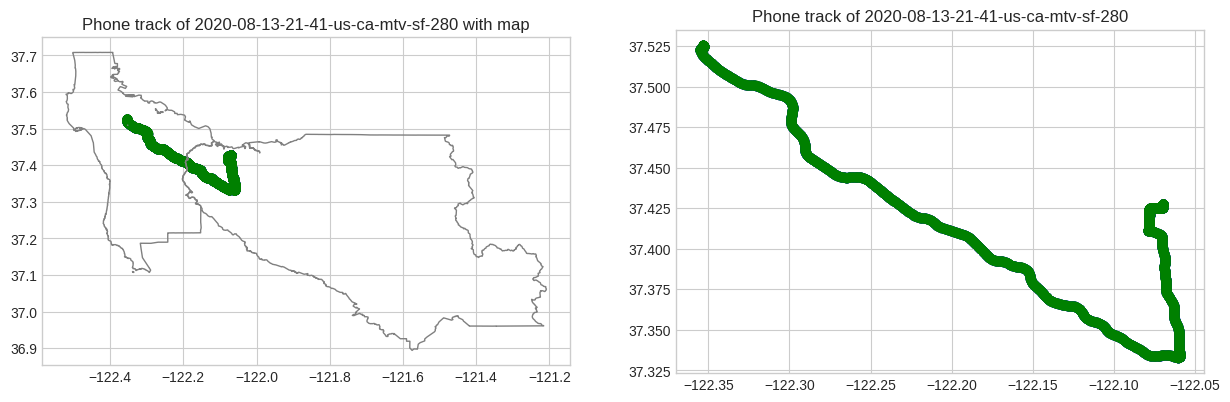

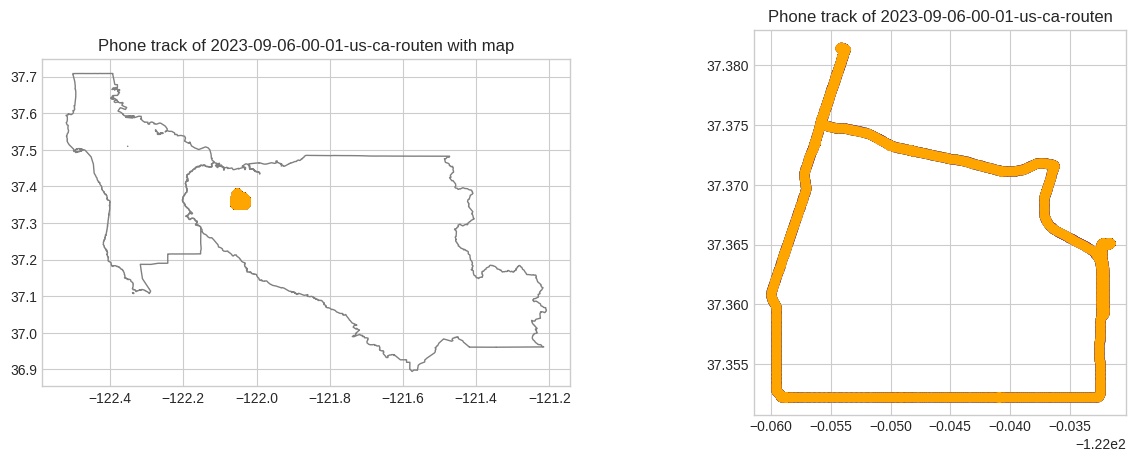

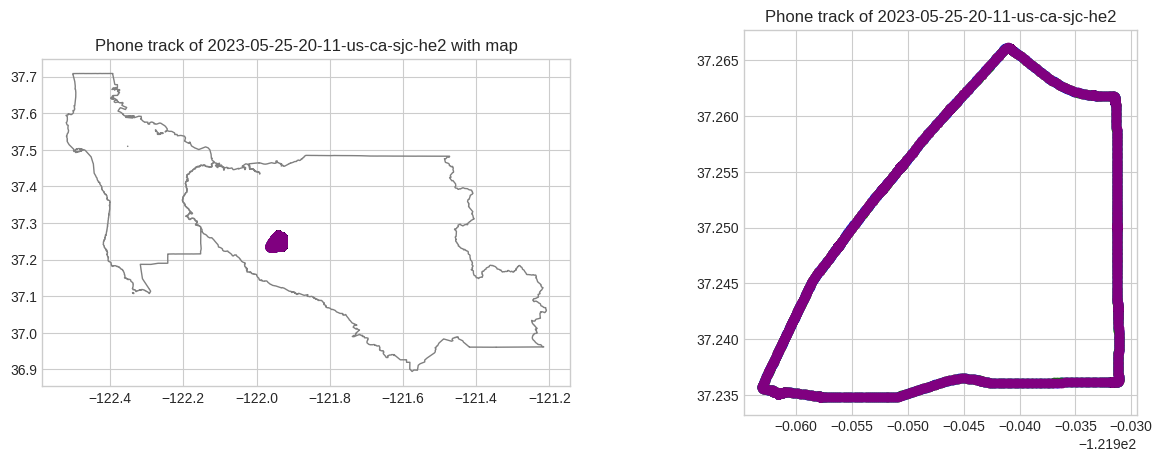

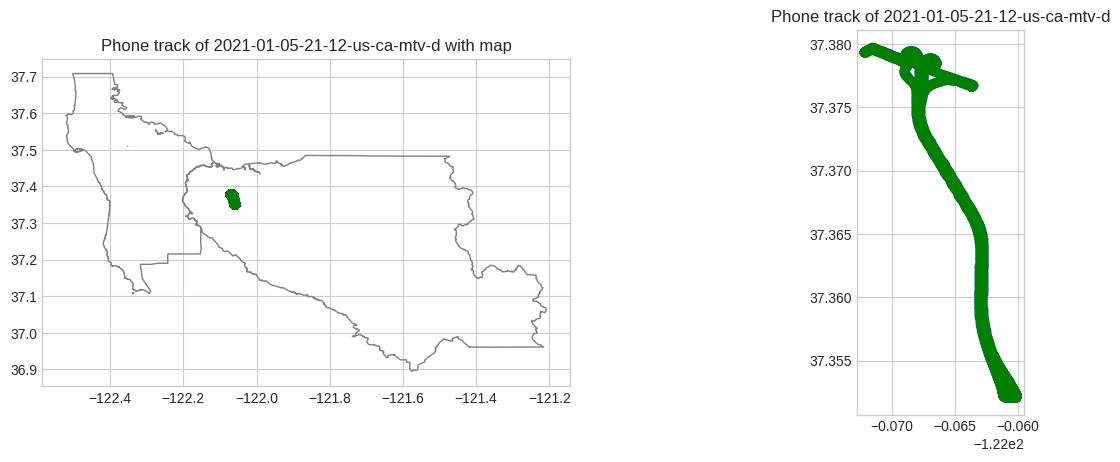

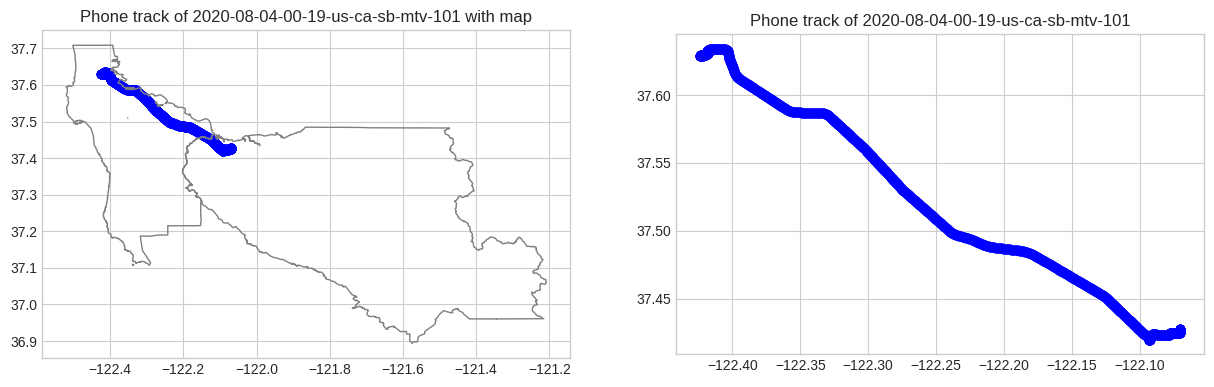

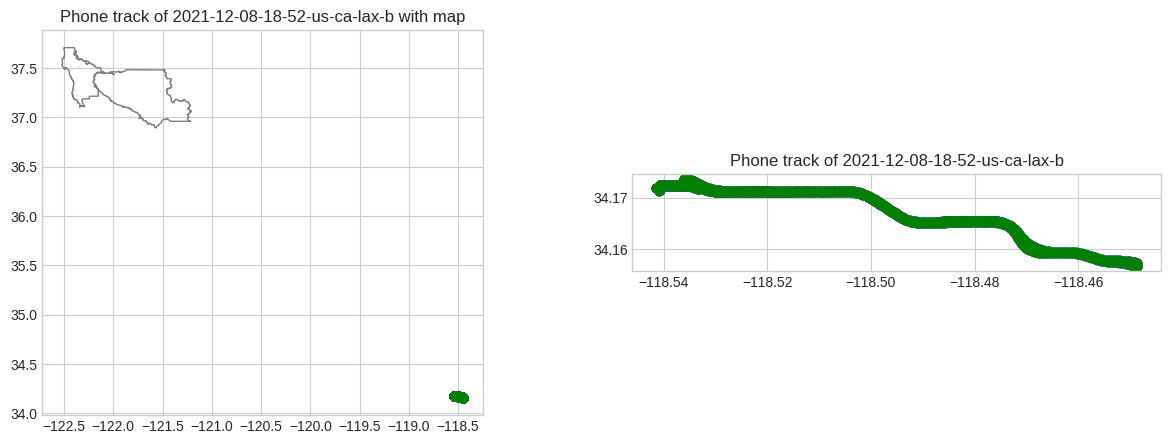

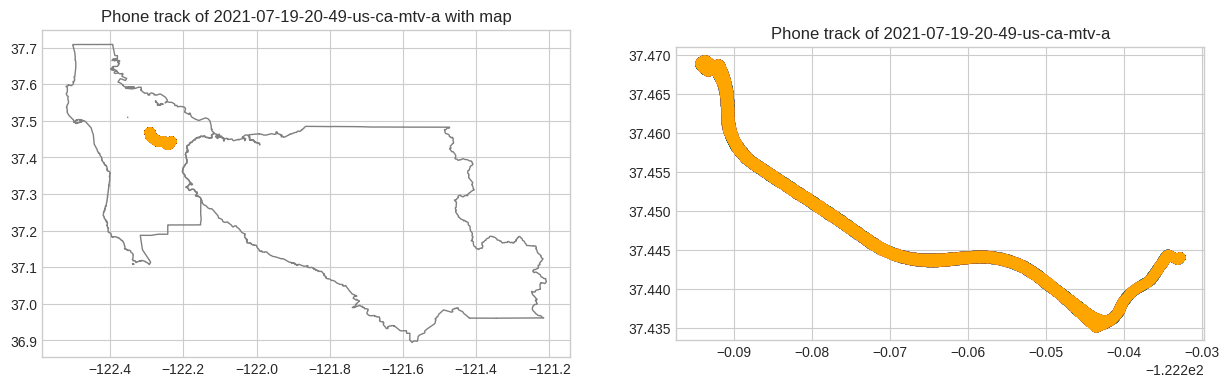

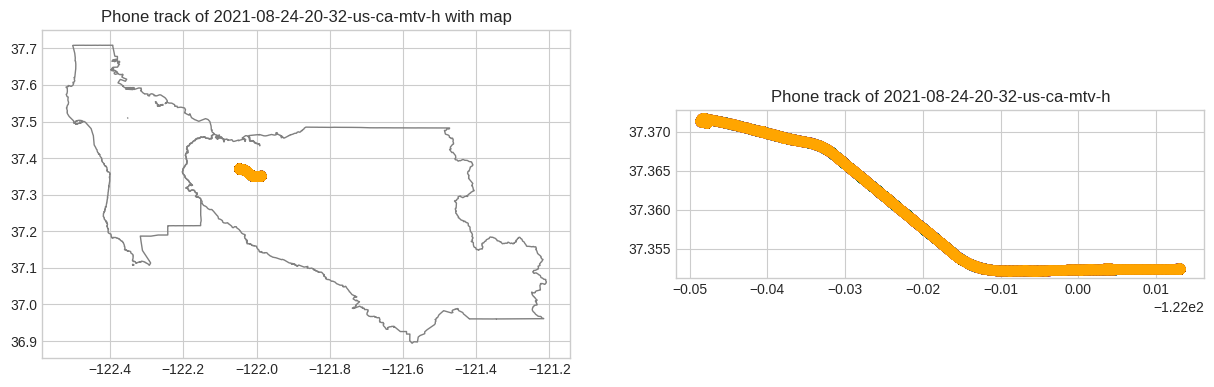

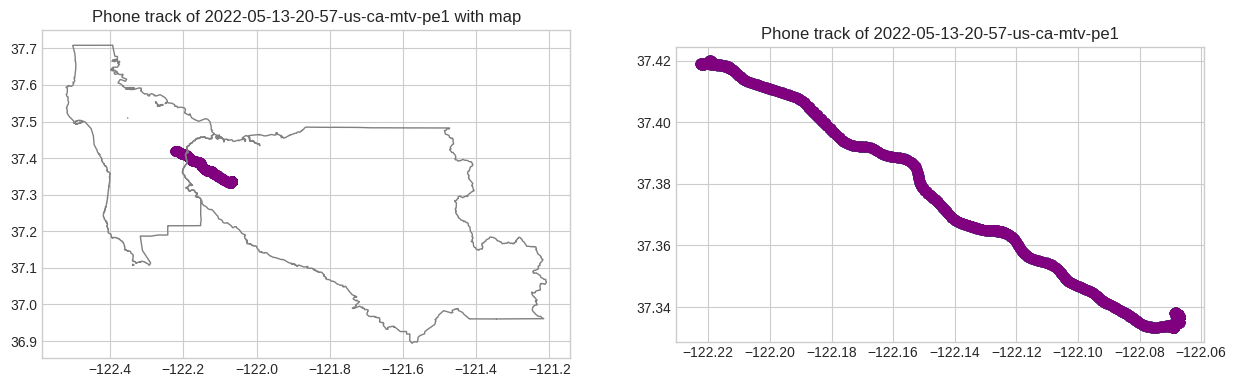

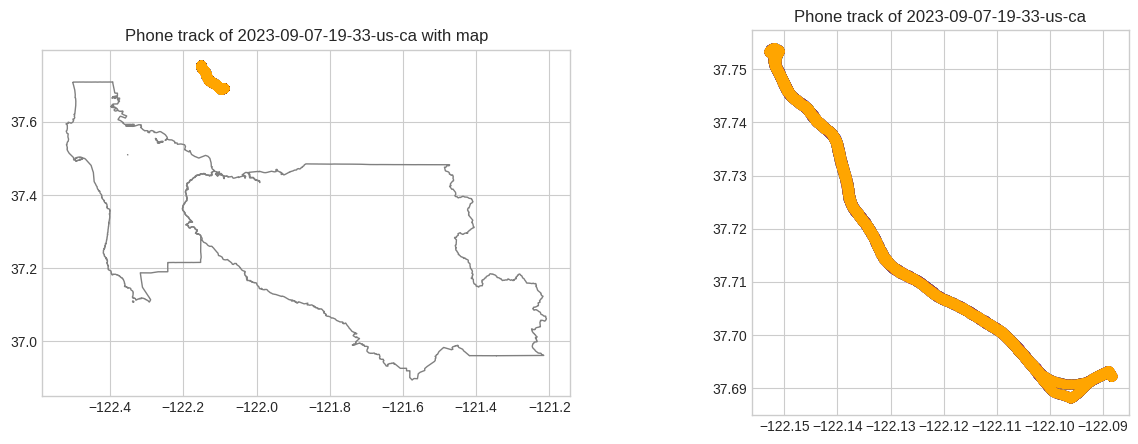

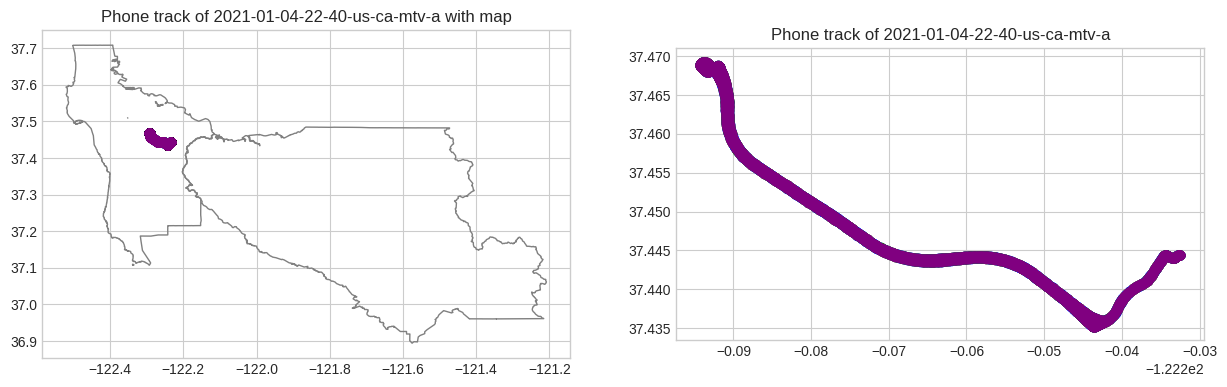

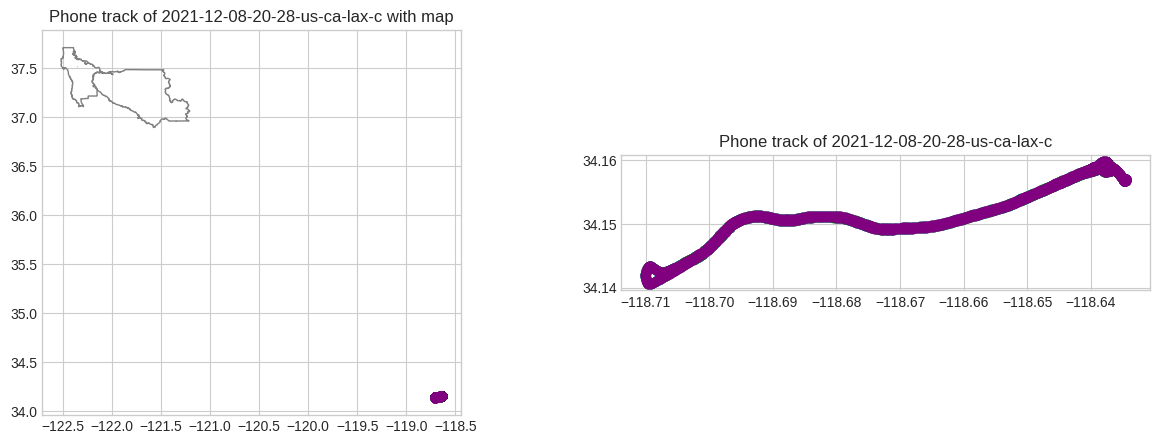

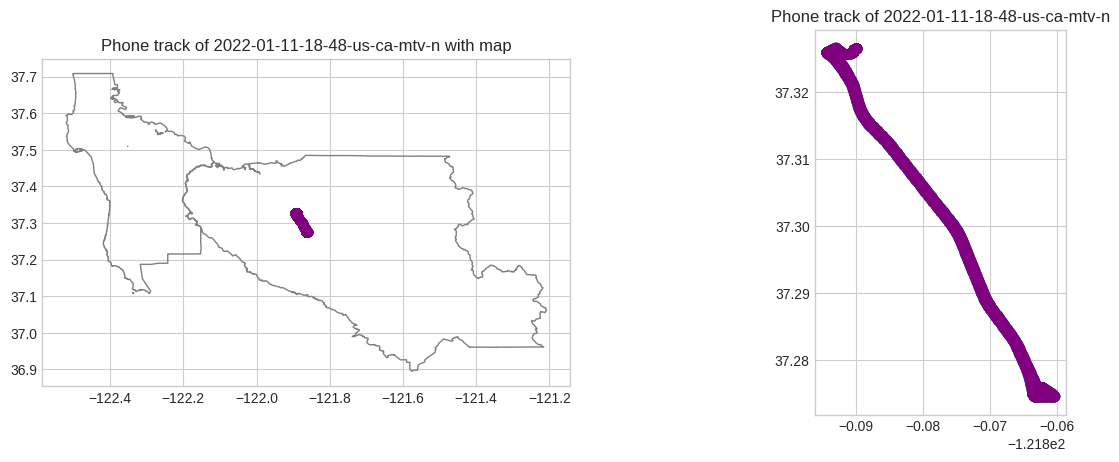

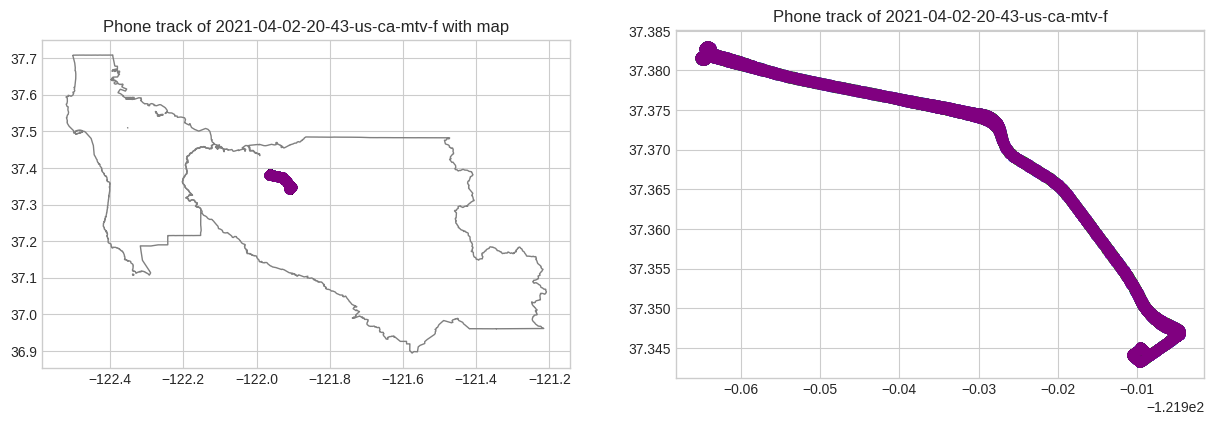

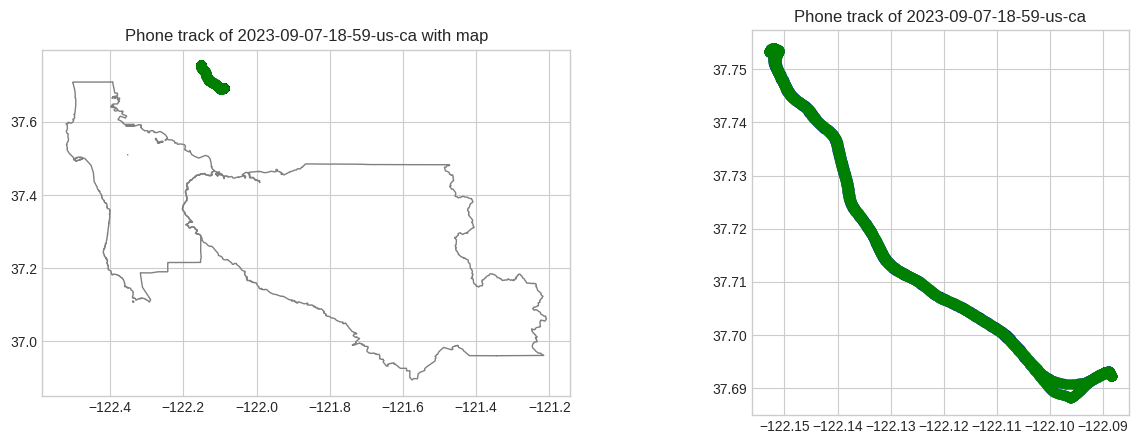

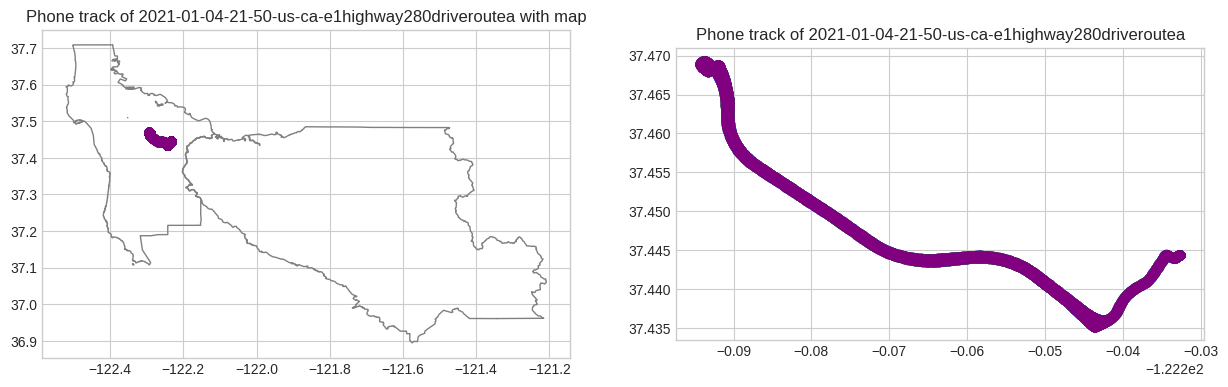

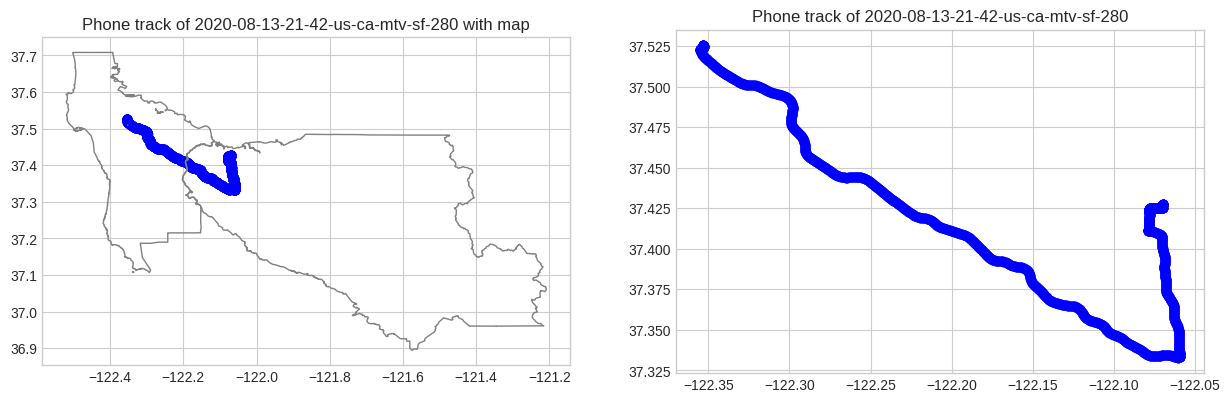

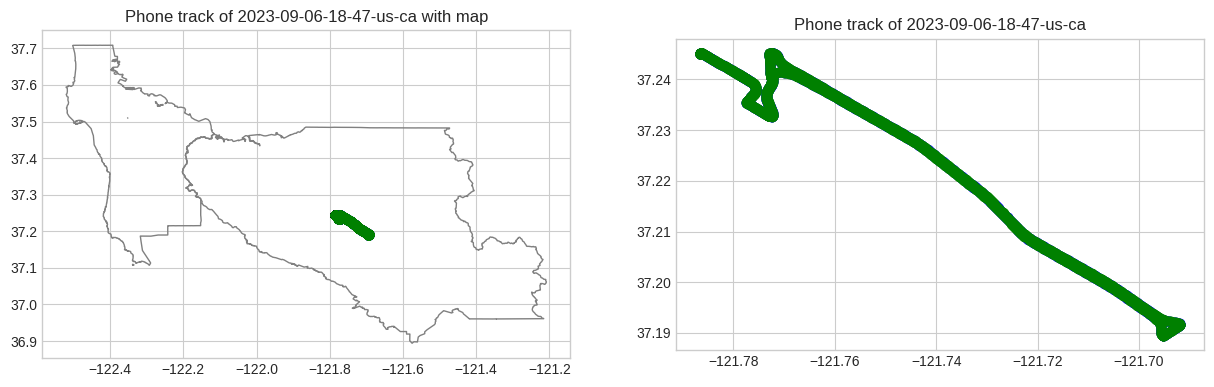

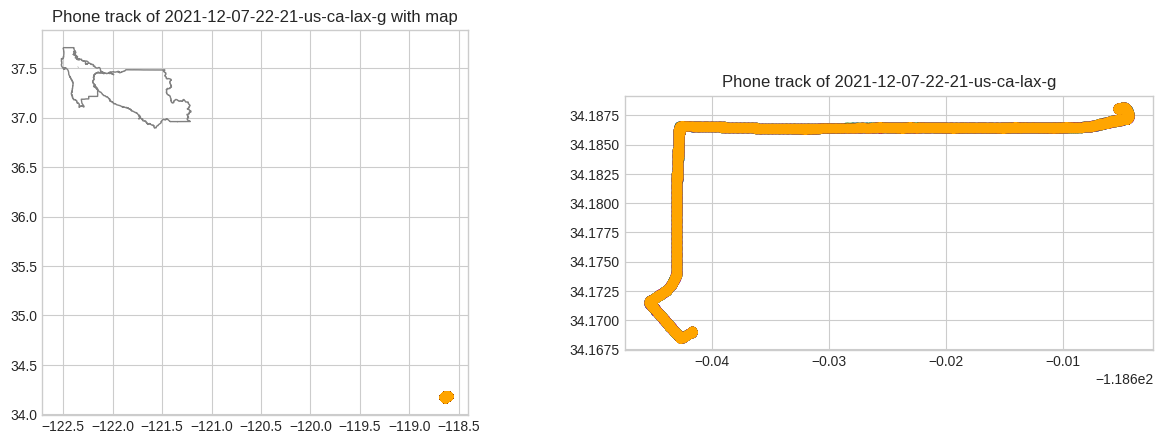

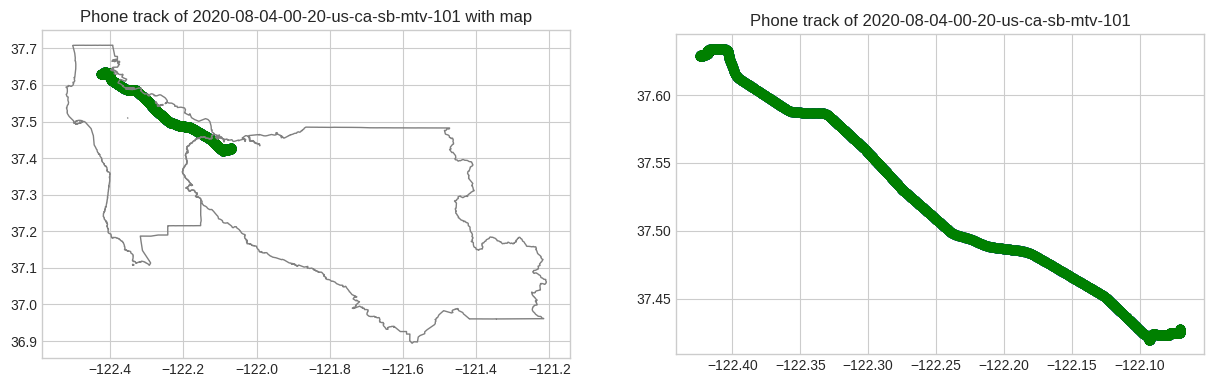

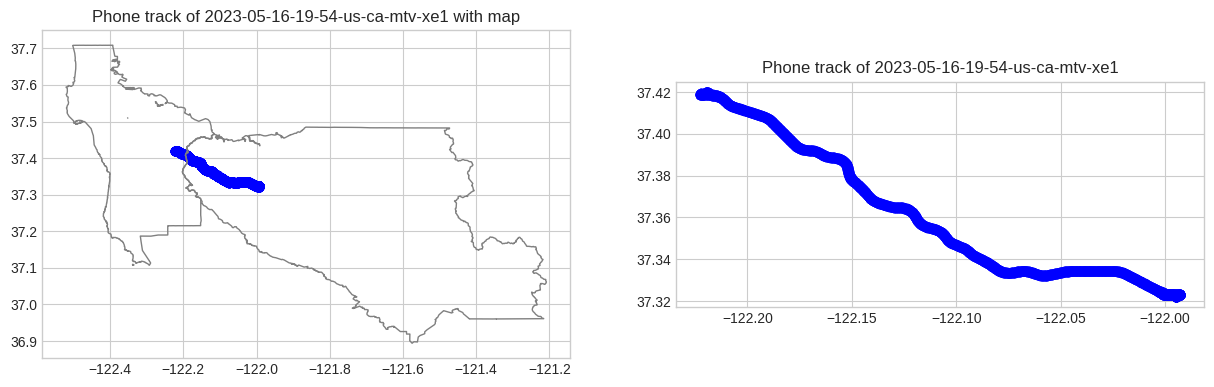

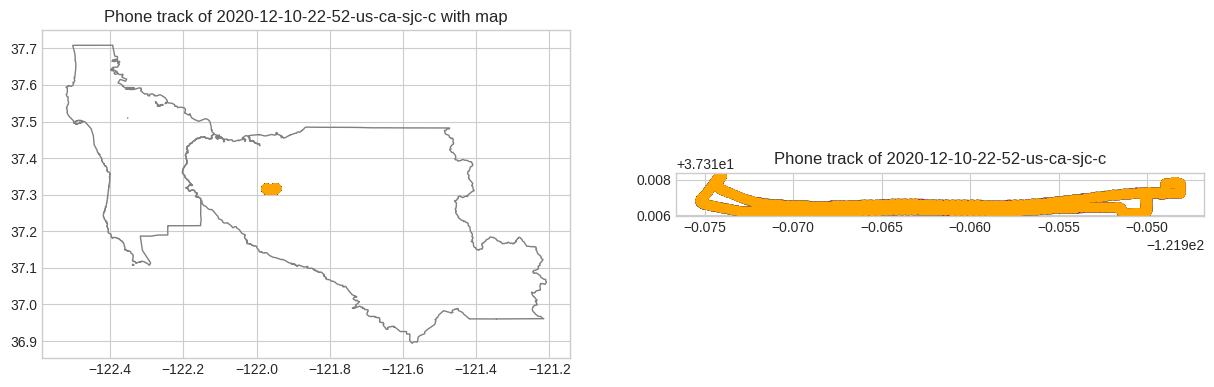

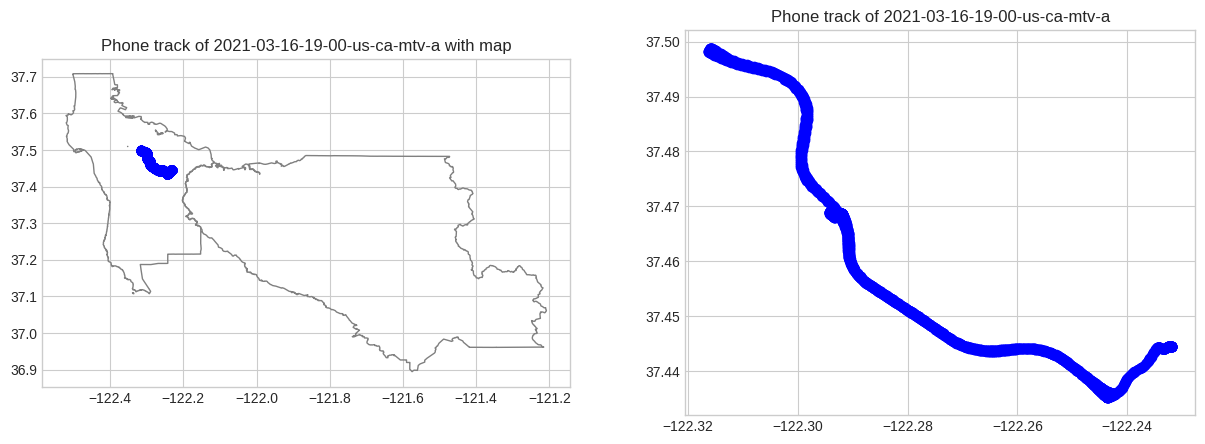

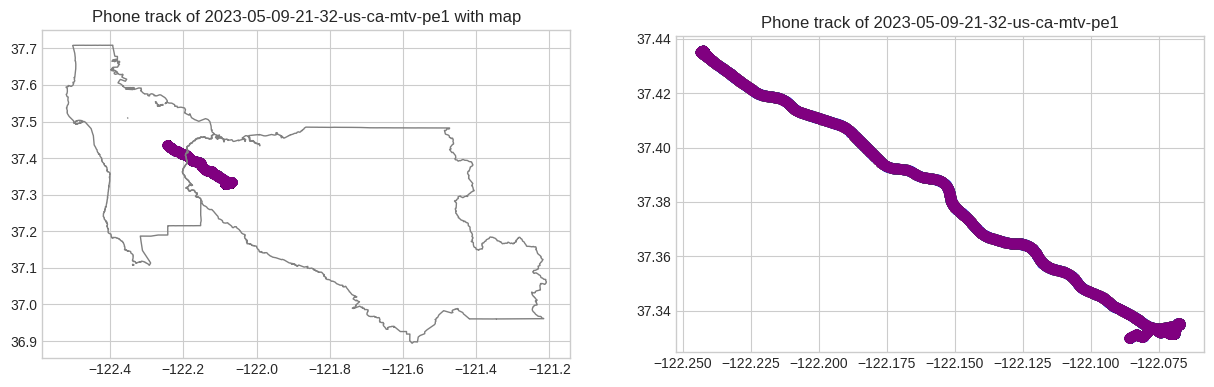

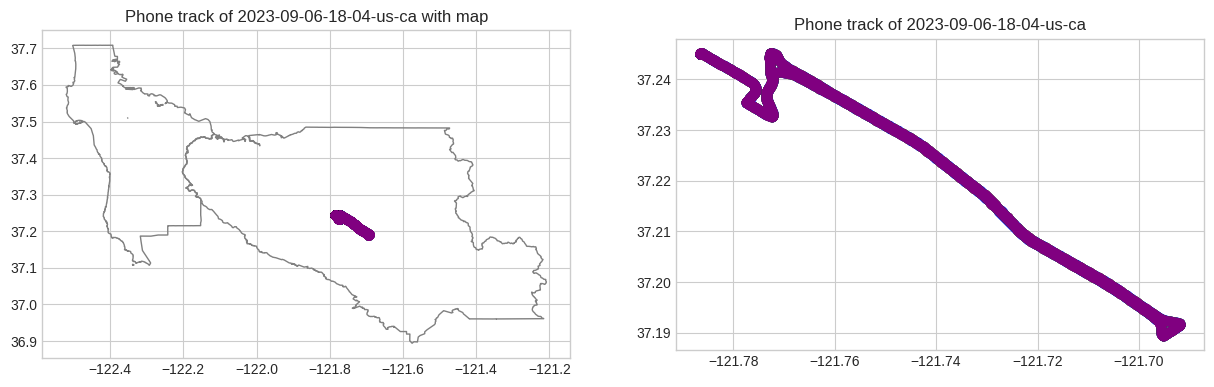

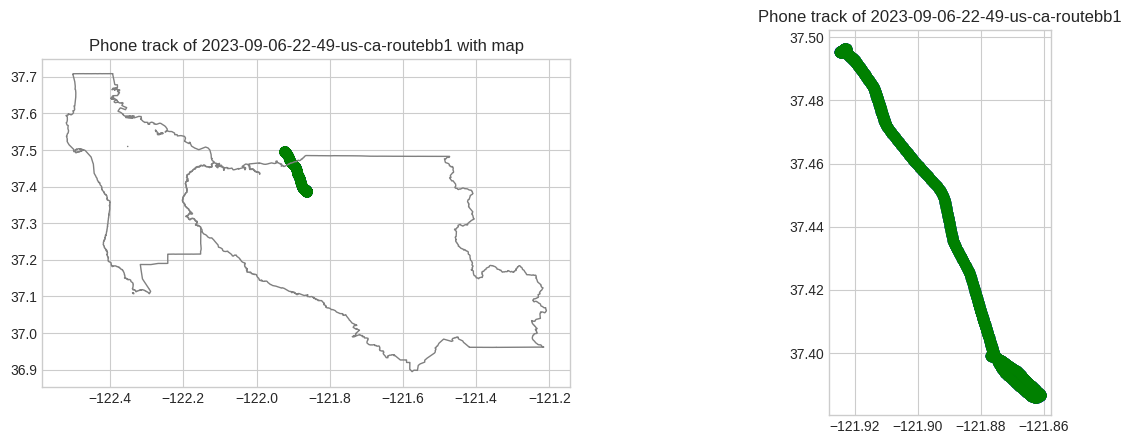

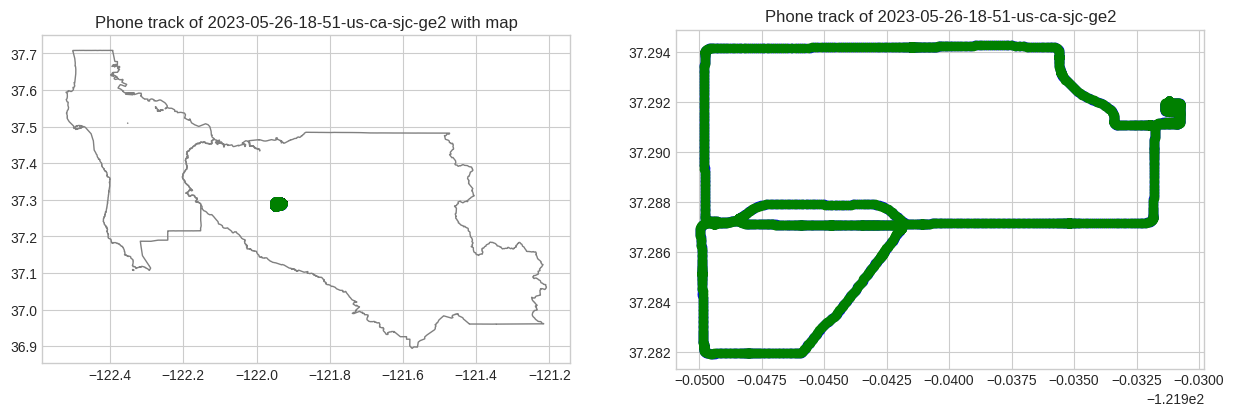

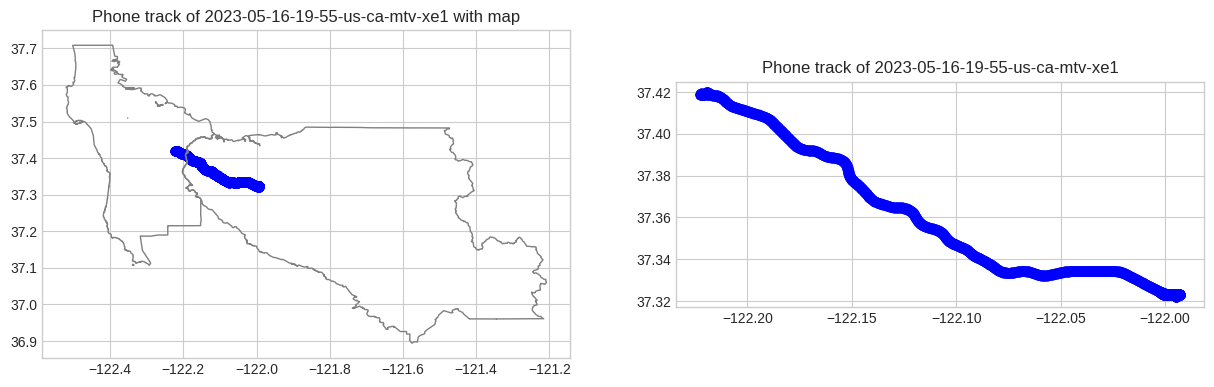

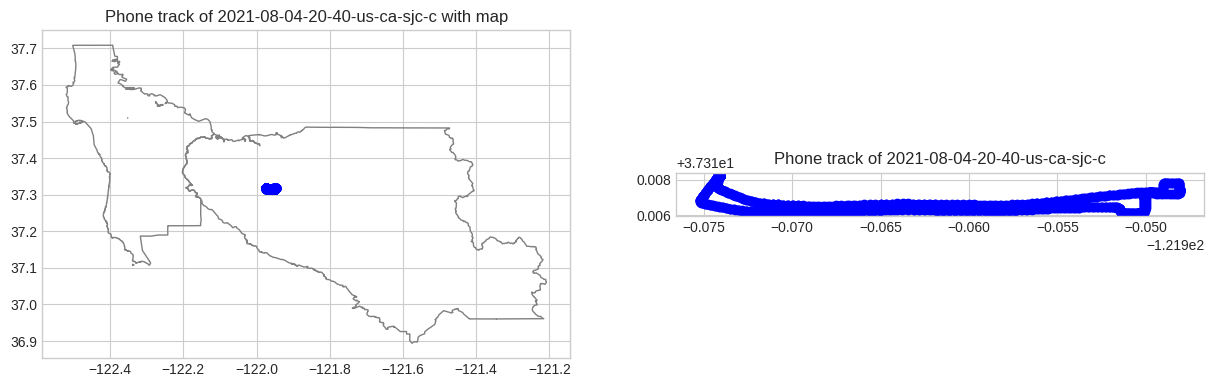

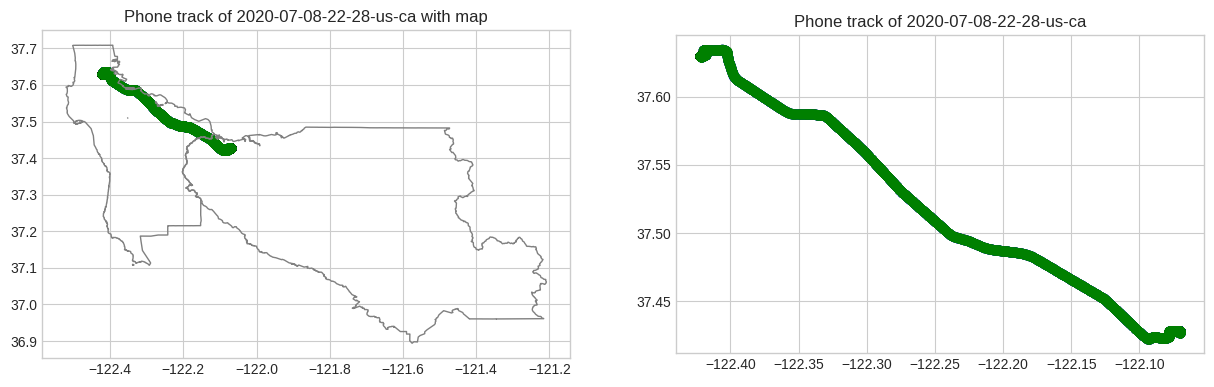

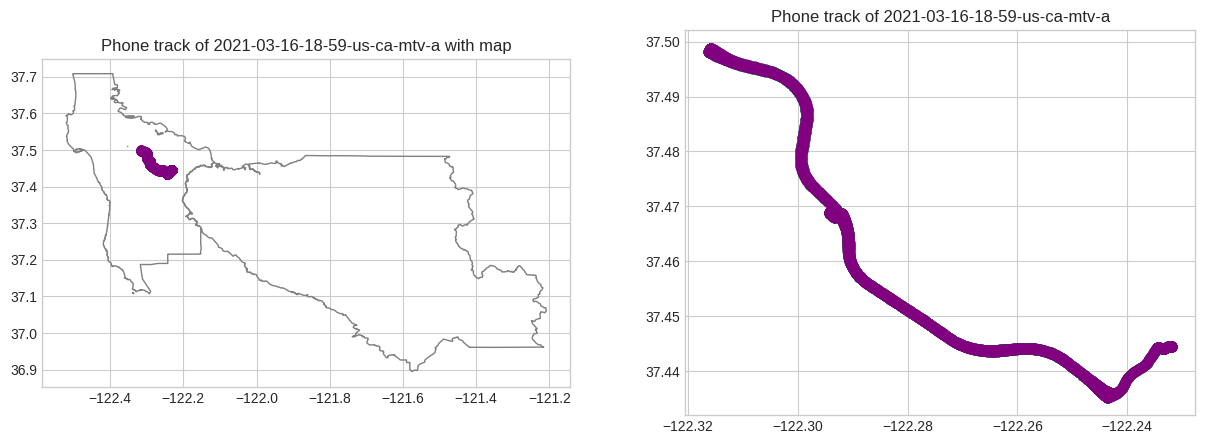

In [43]:
colors = ['blue', 'green', 'purple', 'orange']
for collectionName, gdfs_each_collectionName in zip(collection_names, gdfs):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    gdf_bayarea.plot(figsize=(10,10), color='none', edgecolor='gray', zorder=3, ax=axs[0])
    for i, gdf in enumerate(gdfs_each_collectionName):
        g1 = gdf.plot(color=colors[i], ax=axs[0])
        g1.set_title(f"Phone track of {collectionName} with map")
        g2 = gdf.plot(color=colors[i], ax=axs[1])
        g2.set_title(f"Phone track of {collectionName}")

###Unusable Visualizations

The next way we continued to explore the data is by creating a heatmap. The following code block written by Cade Kennedy and Robert Bingham accomplishes this task. We did not find any information that prompted us to drop any columns or take any other actions at this time.

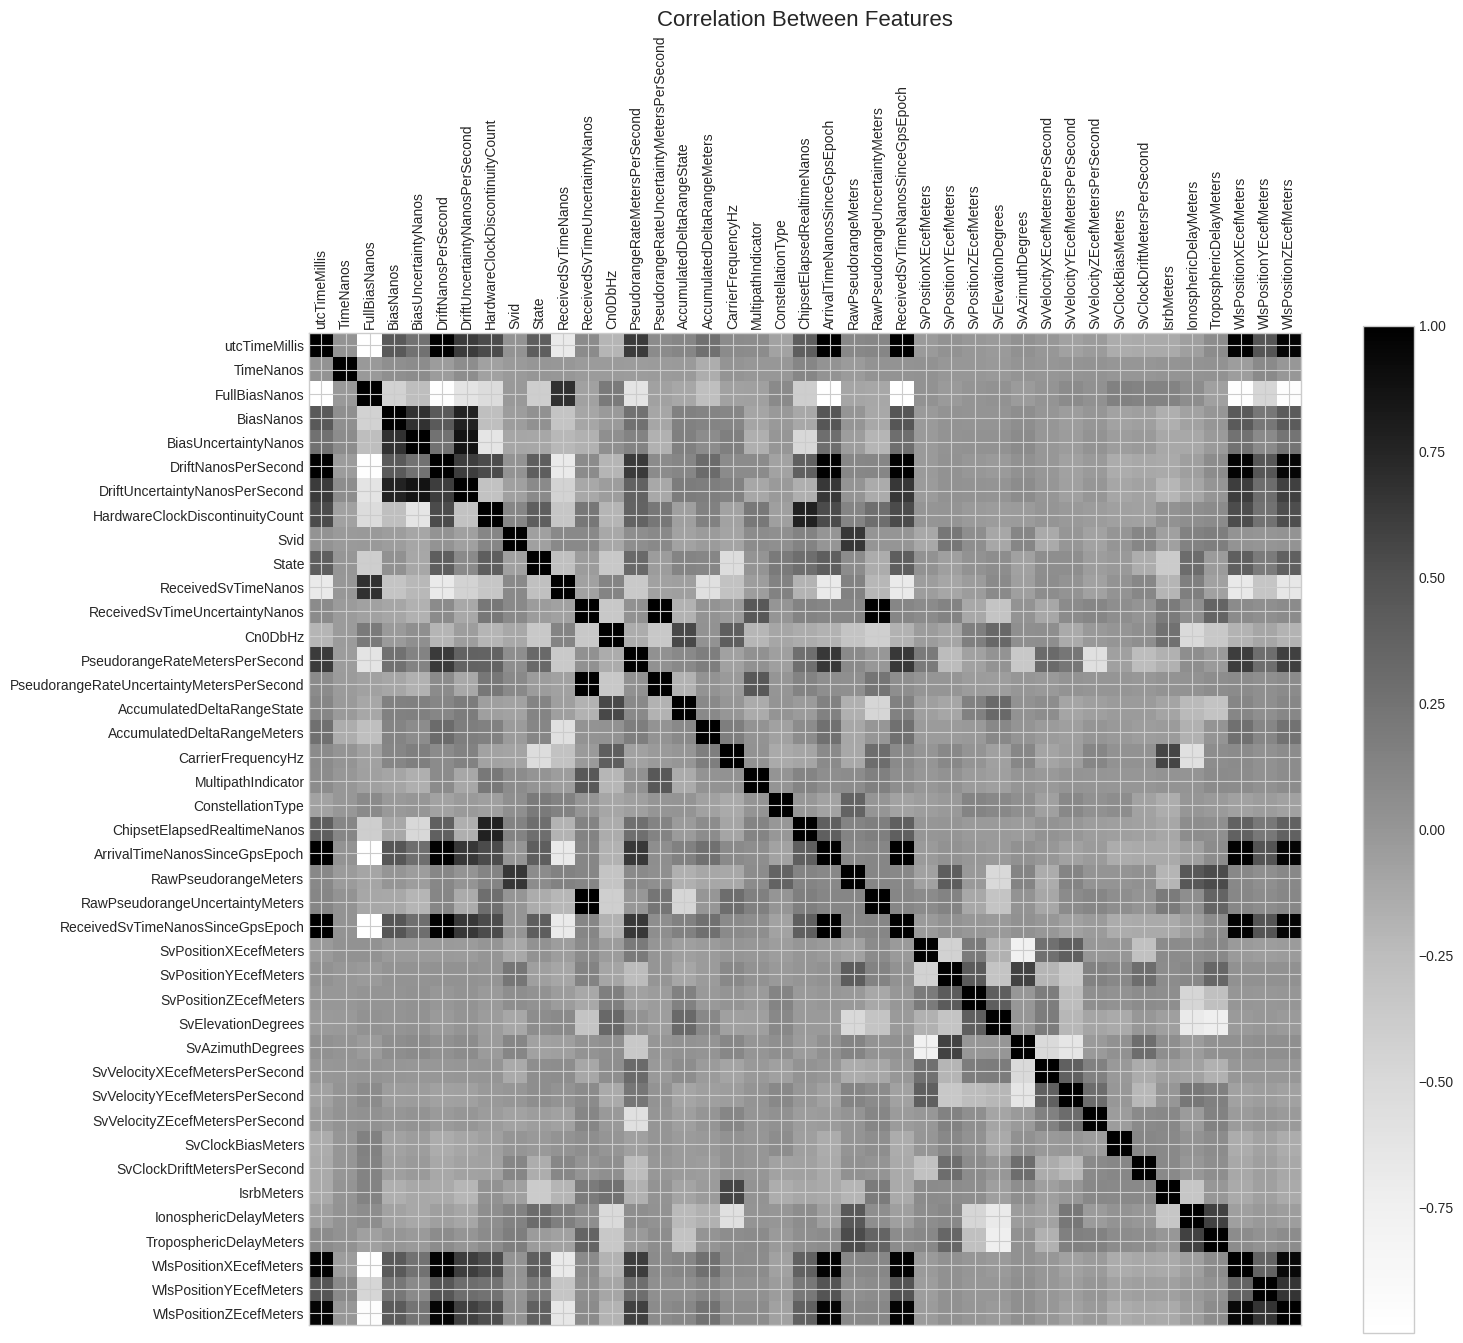

In [44]:
f = plt.figure(figsize=(16, 13))
corr_data = gnss_df.corr().dropna(axis=0, how='all').dropna(axis=1, how='all')
plt.matshow(corr_data, fignum=f.number)
plt.xticks(range(corr_data.select_dtypes(['number']).shape[1]), corr_data.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(corr_data.select_dtypes(['number']).shape[1]), corr_data.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Between Features', fontsize=16)
plt.show()

## (d) Data Cleaning

Running this next line of code, we can get a sum of all the zero values and null values in the dataset. From this, we can see that some columns are entirely null and should be dropped from the dataset, as there is no possible way we can use them. For the columns with zero values, there is a possibility that these columns can prove to be meaningful, so they will not be dropped. As for the other zero values, these can be accurate measurements from the device and should not be modified in any way, unless the device/measurement is proved to be inaccurate. This analysis and reasoning was completed and documented by Robert Bingham and Harrison Peloquin.

In [45]:
split_out = [gnss_df.isin([0]).sum(), gnss_df.isnull().sum()]
print('\n'.join(map('    '.join, zip(*(x.to_string().split('\n') for x in split_out)))))

MessageType                                       0    MessageType                                       0
utcTimeMillis                                     0    utcTimeMillis                                     0
TimeNanos                                         0    TimeNanos                                         0
LeapSecond                                        0    LeapSecond                                    70401
TimeUncertaintyNanos                          68059    TimeUncertaintyNanos                         216614
FullBiasNanos                                     0    FullBiasNanos                                     0
BiasNanos                                    138460    BiasNanos                                         0
BiasUncertaintyNanos                              0    BiasUncertaintyNanos                              0
DriftNanosPerSecond                               0    DriftNanosPerSecond                               0
DriftUncertaintyNanosPerSecond       

We repeat the same process for the ground truth dataframe 'gt_df'.

In [46]:
split_out = [gt_df.isin([0]).sum(), gt_df.isnull().sum()]
print('\n'.join(map('    '.join, zip(*(x.to_string().split('\n') for x in split_out)))))

MessageType                 0    MessageType                  0
Provider                    0    Provider                     0
LatitudeDegrees             0    LatitudeDegrees              0
LongitudeDegrees            0    LongitudeDegrees             0
AltitudeMeters              0    AltitudeMeters               0
SpeedMps                  569    SpeedMps                     0
AccuracyMeters              0    AccuracyMeters               0
BearingDegrees              0    BearingDegrees               0
UnixTimeMillis              0    UnixTimeMillis               0
SpeedAccuracyMps            0    SpeedAccuracyMps          7953
BearingAccuracyDegrees      0    BearingAccuracyDegrees    7953
elapsedRealtimeNanos        0    elapsedRealtimeNanos      7953
VerticalAccuracyMeters      0    VerticalAccuracyMeters    7953
TripID                      0    TripID                       0


Once more, we repeat with the imu_df dataframe.

In [47]:
split_out = [imu_df.isin([0]).sum(), imu_df.isnull().sum()]
print('\n'.join(map('    '.join, zip(*(x.to_string().split('\n') for x in split_out)))))

MessageType                   0    MessageType             0
utcTimeMillis                 0    utcTimeMillis           0
elapsedRealtimeNanos          0    elapsedRealtimeNanos    0
MeasurementX               1989    MeasurementX            0
MeasurementY              15257    MeasurementY            0
MeasurementZ               7554    MeasurementZ            0
BiasX                   1784607    BiasX                   0
BiasY                   1784607    BiasY                   0
BiasZ                   1784607    BiasZ                   0
TripID                        0    TripID                  0


To see our results, we print the shape before and after dropping the columns.

In [48]:
print('Shape before dropping columns: ', gnss_df.shape)
gnss_df = gnss_df.drop(columns=['CarrierCycles',
                                'CarrierPhase',
                                'CarrierPhaseUncertainty',
                                'SnrInDb',
                                'AgcDb',
                                'BasebandCn0DbHz',
                                'FullInterSignalBiasNanos',
                                'FullInterSignalBiasUncertaintyNanos',
                                'SatelliteInterSignalBiasNanos',
                                'SatelliteInterSignalBiasUncertaintyNanos',
                                'CodeType'])
print('Shape after dropping columns: ', gnss_df.shape)

Shape before dropping columns:  (284673, 59)
Shape after dropping columns:  (284673, 48)


We repeat the process to see the results for the ground truth dataframe 'gt_df'.

In [49]:
print('Shape before dropping columns: ', gt_df.shape)
gt_df = gt_df.drop(columns=['SpeedAccuracyMps',
                            'BearingAccuracyDegrees',
                            'elapsedRealtimeNanos',
                            'VerticalAccuracyMeters'])
print('Shape after dropping columns: ', gt_df.shape)

Shape before dropping columns:  (7953, 14)
Shape after dropping columns:  (7953, 10)


Then, we decided to observe the columns for any outliers. We wrote the following code to create boxplots for each of the columns. At first glance, we thought there could be some outliers worth removing. For example, ‘FullBiasNanos’ displays data points extremely far from the interquartile range. However, when we took a closer look, we found that there is a significant amount of data points grouped together in this area. We decided that they may be important to our data analysis and decided to keep them. Overall, we have not removed any outliers. This code was written by Robert Bingham and analyzed by all team members.

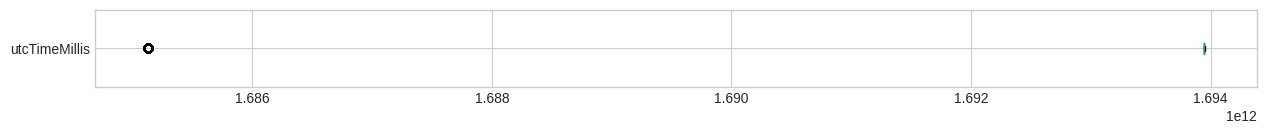

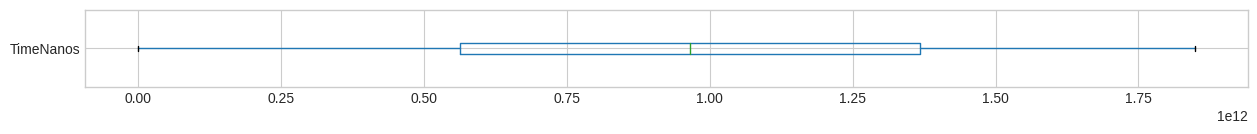

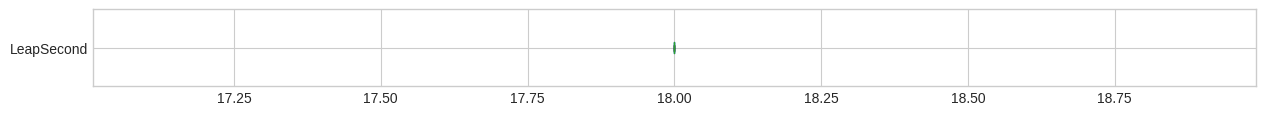

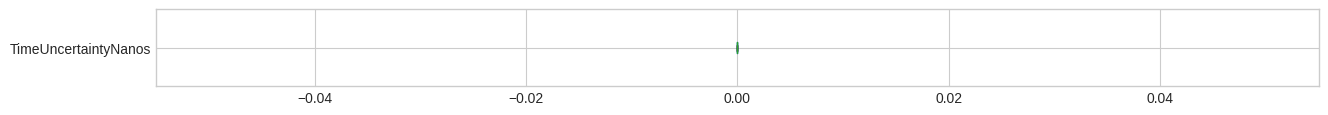

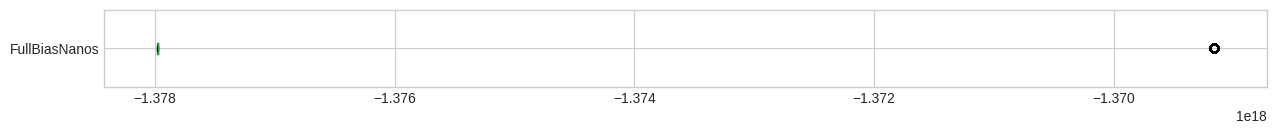

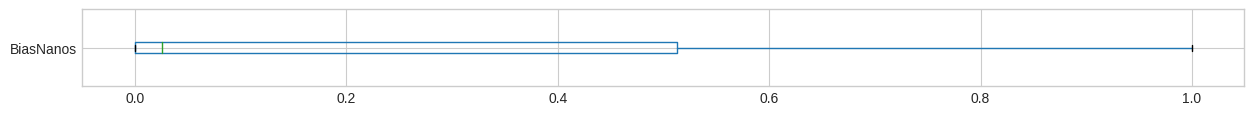

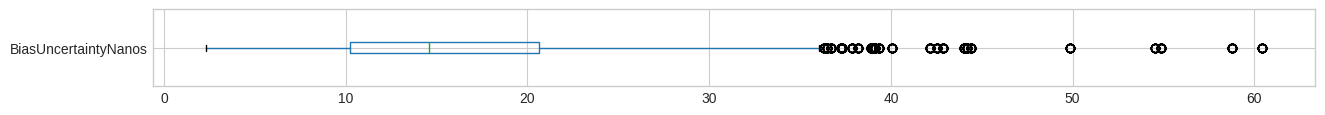

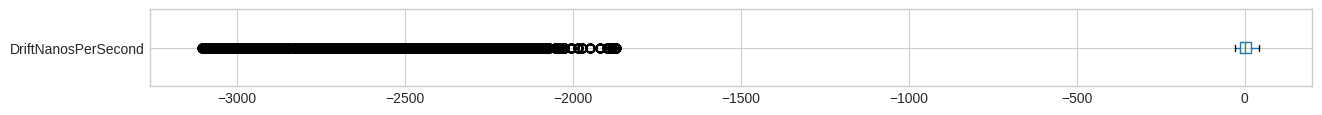

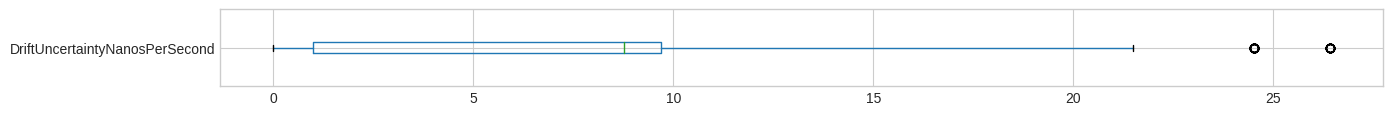

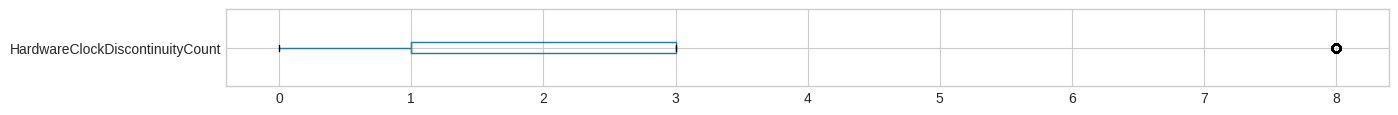

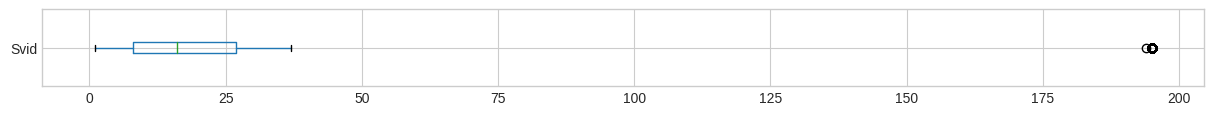

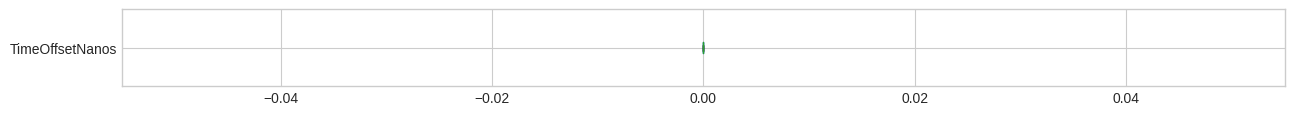

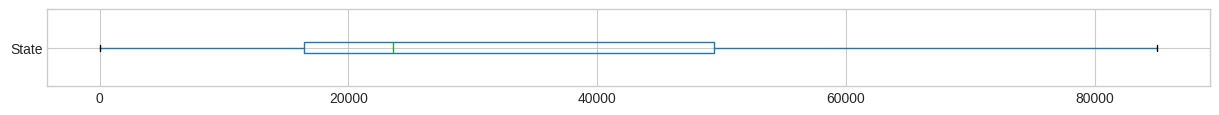

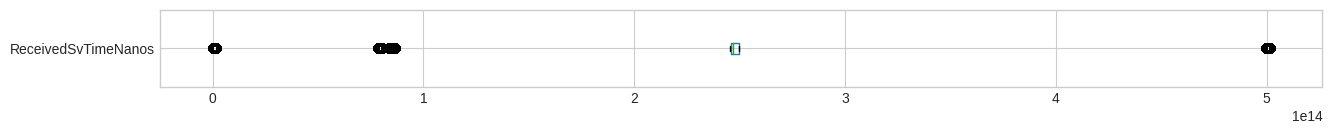

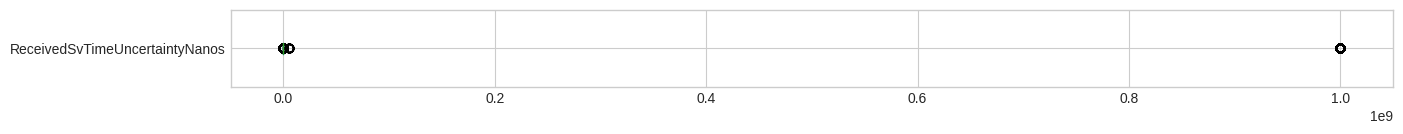

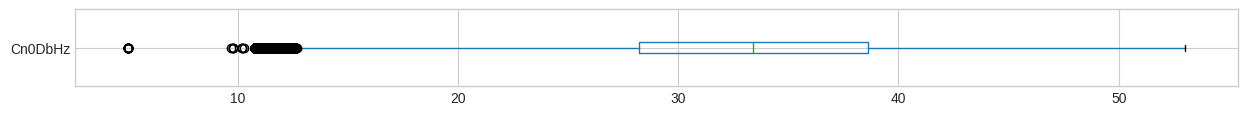

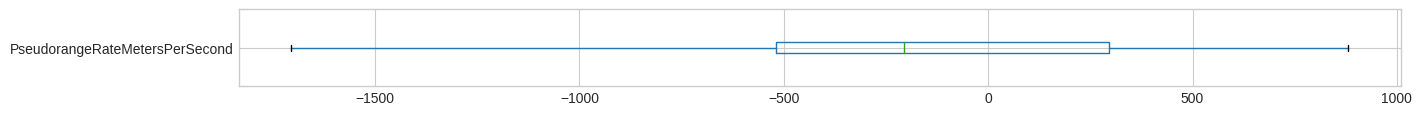

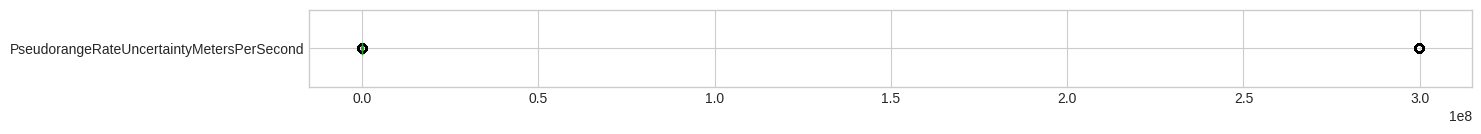

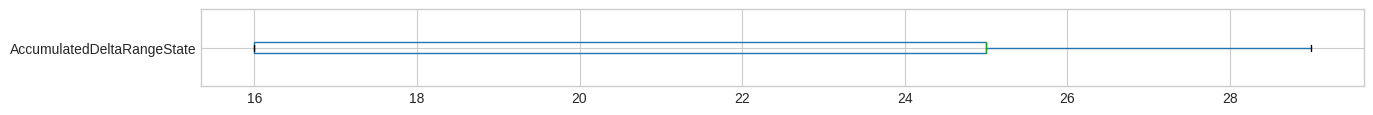

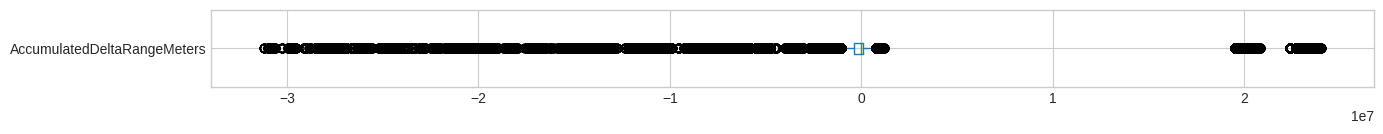

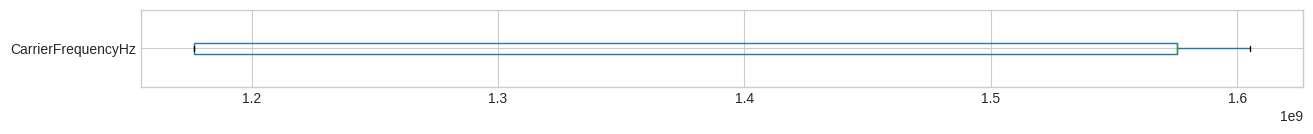

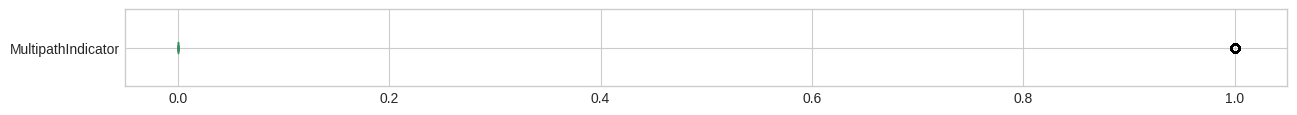

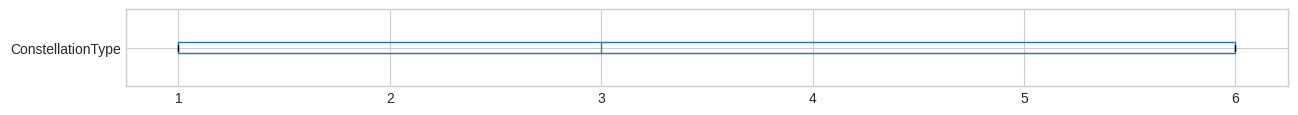

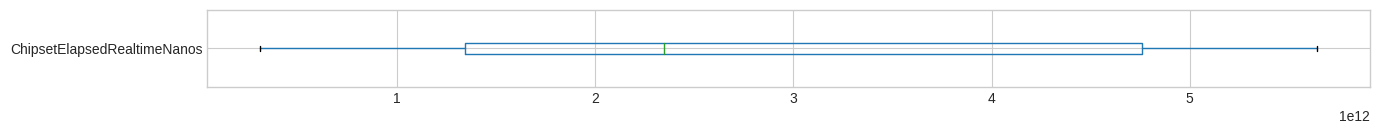

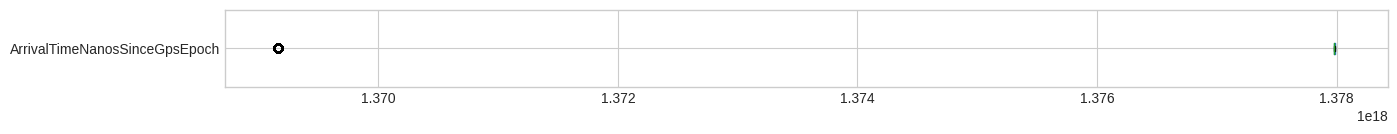

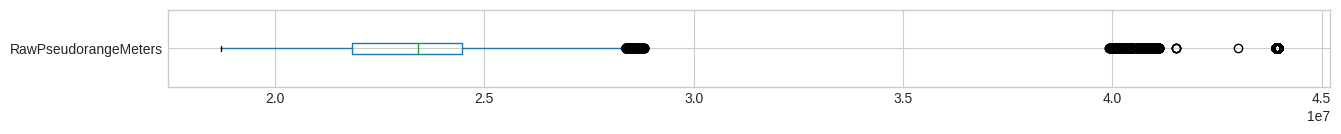

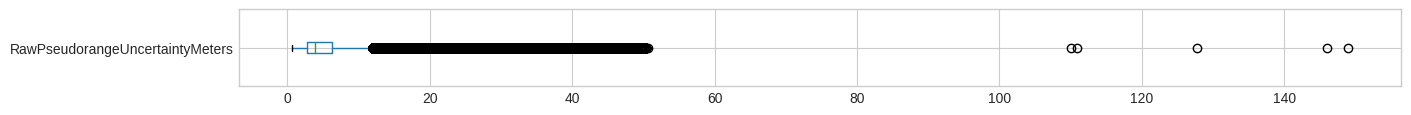

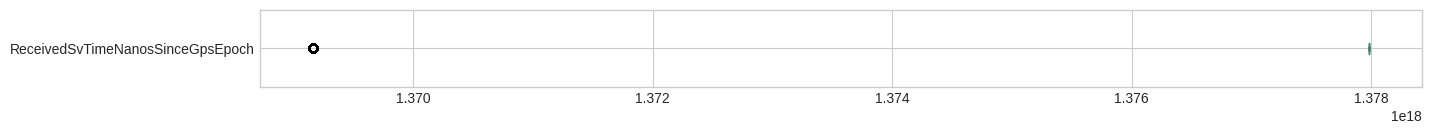

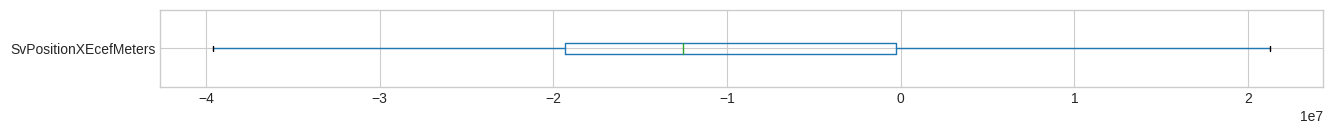

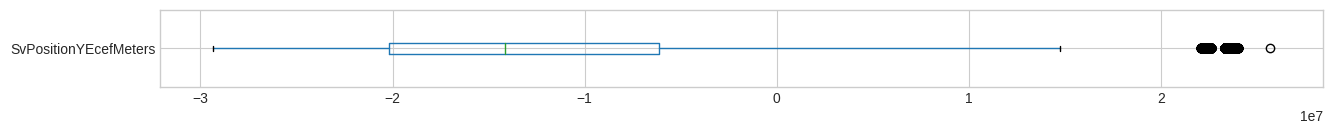

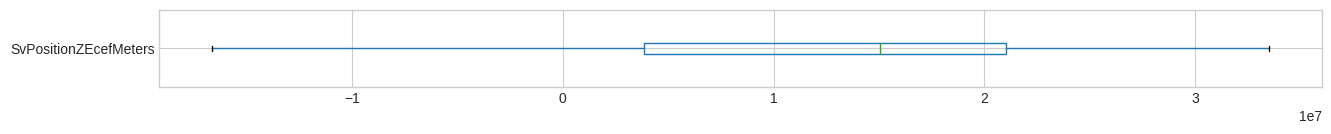

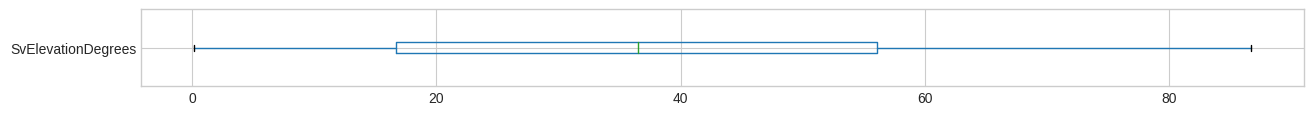

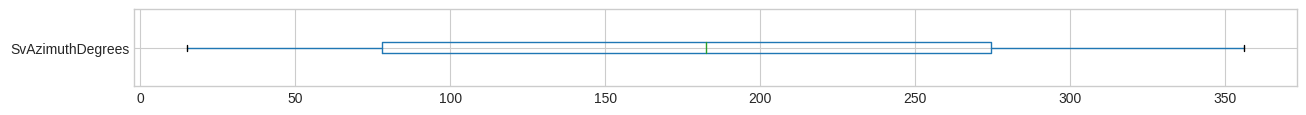

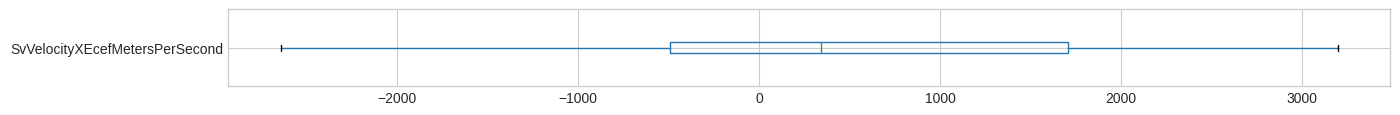

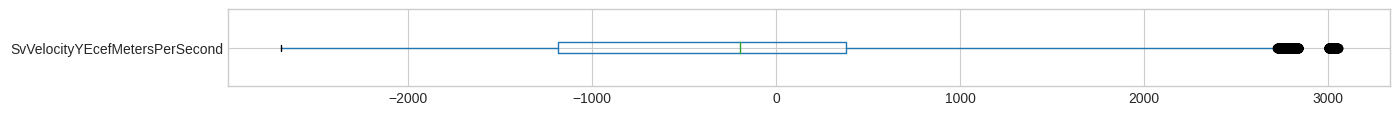

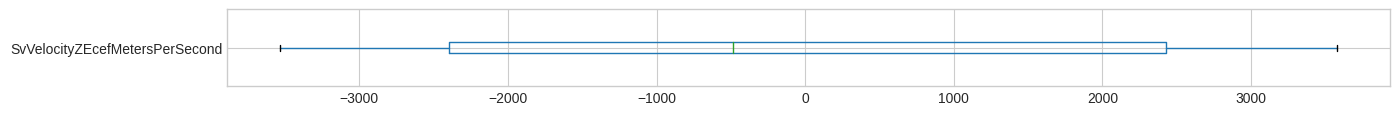

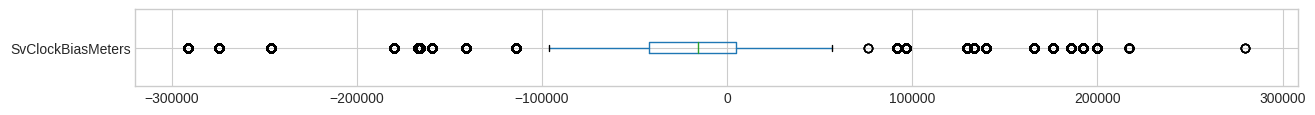

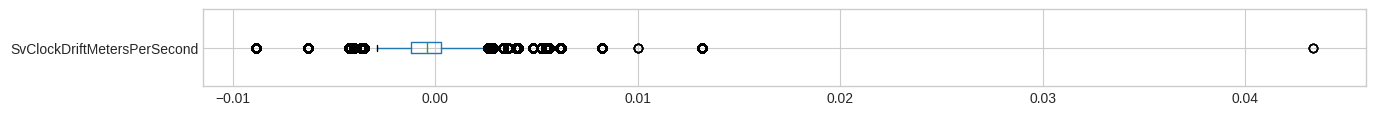

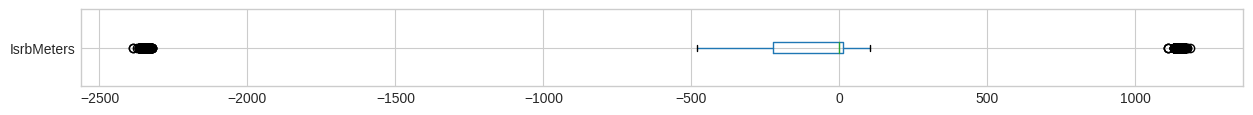

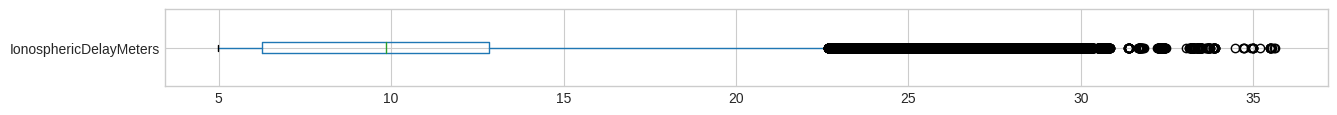

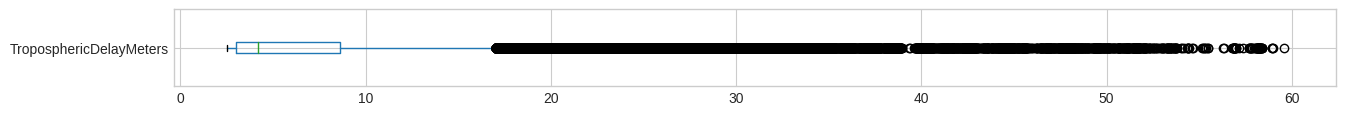

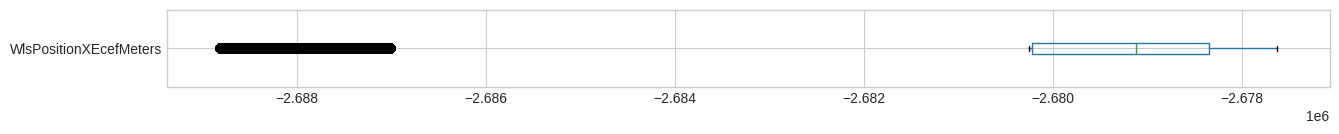

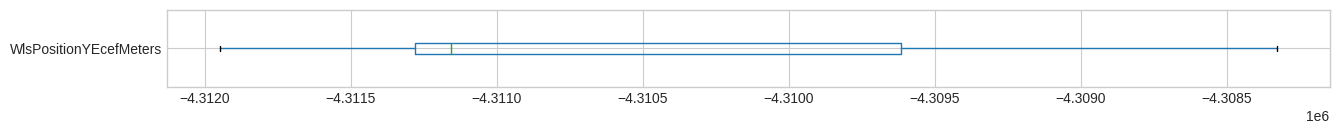

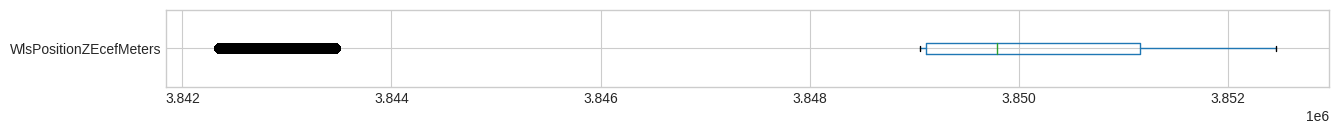

In [50]:
for x in gnss_df.select_dtypes(include='number'):
    plt.figure(figsize=(15, 1))
    gnss_df.boxplot([x], vert=False)

## (e) Data Modeling

### Baseline Model: Interpolated Univariate Spline

In [65]:
%%capture --no-stdout

pred_dfs  = []
score_list = []

for TripID in gnss_df['TripID'].unique():
  drive, phone = TripID.split('/')
  pred_df = ecef_to_lat_lng(TripID, gnss_df[gnss_df['TripID'] == TripID], gt_df[gt_df['TripID'] == TripID]['UnixTimeMillis'].to_numpy())
  pred_dfs.append(pred_df)
  score = calc_score(TripID, pred_df, gt_df[gt_df['TripID'] == TripID])
  print(f'{TripID:<45}: score = {score:.3f}')
  score_list.append(score)

2023-09-05-20-13-us-ca/pixel7pro             : score = 5.396
2023-09-05-20-13-us-ca/pixel5                : score = 4.439
2023-09-05-20-59-us-ca/pixel5a               : score = 6.663
2023-09-05-20-59-us-ca/pixel4xl              : score = 3.718
2023-05-26-18-50-us-ca-sjc-ge2/sm-s908b      : score = 5.689


In [66]:
mean_score = np.mean(score_list)
print(f'mean_score = {mean_score:.3f}')

mean_score = 5.181


### Model 2: K-Nearest Neighbors


In [54]:
SAMPLE = pd.read_csv('/content/smartphone-decimeter-2023/sdc2023/sample_submission.csv')
display(SAMPLE)

tripId  UnixTimeMillis  \
0         2020-12-11-19-30-us-ca-mtv-e/pixel4xl   1607715055442   
1         2020-12-11-19-30-us-ca-mtv-e/pixel4xl   1607715056442   
2         2020-12-11-19-30-us-ca-mtv-e/pixel4xl   1607715057442   
3         2020-12-11-19-30-us-ca-mtv-e/pixel4xl   1607715058442   
4         2020-12-11-19-30-us-ca-mtv-e/pixel4xl   1607715059442   
...                                         ...             ...   
71931  2023-06-15-18-49-us-ca-sjc-ce1/pixel7pro   1686856468000   
71932  2023-06-15-18-49-us-ca-sjc-ce1/pixel7pro   1686856469000   
71933  2023-06-15-18-49-us-ca-sjc-ce1/pixel7pro   1686856470000   
71934  2023-06-15-18-49-us-ca-sjc-ce1/pixel7pro   1686856471000   
71935  2023-06-15-18-49-us-ca-sjc-ce1/pixel7pro   1686856472000   

       LatitudeDegrees  LongitudeDegrees  
0            34.640195       -120.589642  
1            34.640195       -120.589642  
2            34.640195       -120.589642  
3            34.640195       -120.589642  
4            34.640195       -120.589642  
...                ...               ...  
71931        34.640195       -120.589642  
71932        34.640195       -120.589642  
71933        34.640195       -120.589642  
71934        34.640195       -120.589642  
71935        34.640195       -120.589642  

[71936 rows x 4 columns]

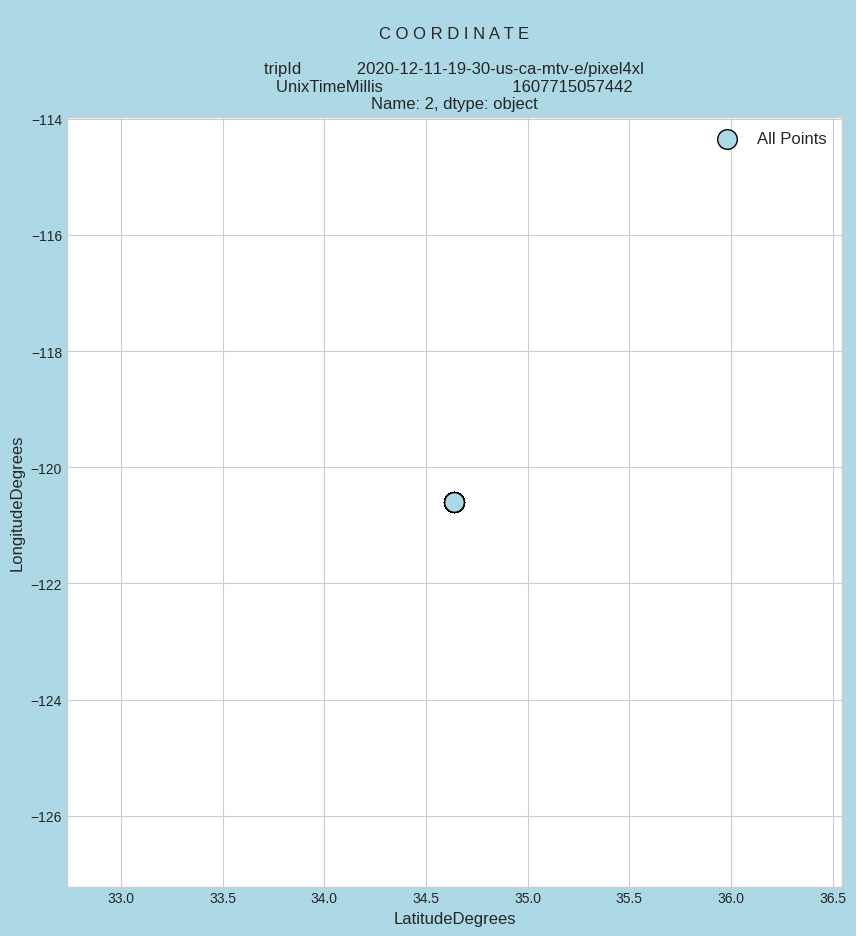

In [64]:
from sklearn.neighbors import NearestNeighbors

phones = SAMPLE['tripId'].unique()
knn = NearestNeighbors(n_neighbors=len(phones), algorithm='ball_tree').fit(SAMPLE.iloc[:,2:4])
_ , indices_N = knn.kneighbors(SAMPLE.iloc[:,2:4])

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10), facecolor='lightblue')
plt.title(f'\nC O O R D I N A T E\n\n{SAMPLE.iloc[i][:2]}')

plt.scatter(SAMPLE.iloc[:,2:3], SAMPLE.iloc[:,3:4], s=200, facecolor='lightblue', edgecolor='black', label='All Points')

plt.legend(fontsize=12)
plt.xlabel('LatitudeDegrees', fontsize=12)
plt.ylabel('LongitudeDegrees', fontsize=12)
plt.savefig(f'Coordinate_{i}.png')
plt.show()

### Model 3: LSTM Neural Network Gradient Boosting Decision Tree SVM

We chose this model because of its history of great models using Time Series Analysis. LSTM neural networks excel in handling sequential data, crucial for time series predictions by retaining memory over extended sequences.

In [ ]:
import keras
from tensorflow.keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
import pandas as pd

data = pd.read_csv("/content/smartphone-decimeter-2023/sdc2023/train/2023-05-26-18-50-us-ca-sjc-ge2/sm-s908b/device_gnss.csv")

train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data
train_data = train_data.reshape(1, -1)
train_data = [x for x in train_data if isinstance(x, (int, float))]
test_data = [x for x in test_data if isinstance(x, (int, float))]


scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [ ]:
import pandas as pd
import glob

filenames_gnss = glob.glob('/content/smartphone-decimeter-2023/sdc2023/train/2023-*/*/device_gnss.csv')
filenames_gt = glob.glob('/content/smartphone-decimeter-2023/sdc2023/train/2023-*/*/ground_truth.csv')
df_train_gnss = []
df_train_gt = []

for file in filenames_gnss:
  df_train_gnss.append(pd.read_csv(file))

for file in filenames_gt:
  df_train_gt.append(pd.read_csv(file))

gnss_train_size = int(len(df_train_gnss) * 0.8)
gnss_train_data, gnss_test_data = df_train_gnss[:gnss_train_size], df_train_gnss[gnss_train_size:]

gnss_train_data = pd.concat(gnss_train_data)
gnss_test_data = pd.concat(gnss_test_data)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

gnss_train_data = np.array(gnss_train_data)
gnss_train_data = gnss_train_data.reshape(-1, 1)

# Filter out non-numeric values
gnss_train_data = [x for x in gnss_train_data if isinstance(x, (int, float))]

print(gnss_train_data)



scaler = MinMaxScaler()
gnss_train_data = scaler.fit_transform(gnss_train_data)
gnss_test_data = scaler.transform(gnss_test_data)


In [ ]:

import numpy as np

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 50

# Create sequences for training set
X_train, y_train = create_sequences(train_data, seq_length)

# Create sequences for testing set
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
model1 = Sequential()
model1.add(LSTM(50, return_sequences=True, input_shape=(gnss_df.shape[1], 1)))
model1.add(LSTM(50, return_sequences=False))
model1.add(Dense(25))
model1.add(Dense(1))

In [ ]:
model1.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model1.fit(gnss_df, gt_df, batch_size=1, epochs=1)

###Model 3: Graph Neural Network

The second model we are considering is Graph Neural Networks (GNNs). This is primarily because of its strength modeling complex, non-Euclidean relationships like those found in our GNSS data, which other more traditional models like Convolutional Neural Networks (CNNs) cannot do as efficiently as many of them require grid-like data.